# 신용카드 빅데이터를 활용한 전라도 산업군 분석 
***
**경기대학교 응용통계학과 데이터 분석 동아리 D.N.A**   
심우열, 박세영, 도준희, 유소영, 이지수, 전아현

## 1. 서론
멋지고 간드러지게 써보고 싶다.  
청년대표 20대, 중년 대표 40대, 장년 대표 60대
<br>

## 2. 데이터 소개

 본 분석에서 사용하는 데이터는 Dacon에서 주최한 [제주 신용카드 빅데이터 경진대회](https://dacon.io/competitions/official/235615/overview)에서 제공해주는 데이터를 사용하며 이는 사용지역, 업종, 거주지역 등 준식별자로 구성된 BC카드 사용 내역이 수집되어 있다.  
 
|파일명|설명|
|------|---|
|201901-202003.csv|2019.01 ~ 2020.03 기간 내 신용카드 사용 내역 데이터|
|202004.csv|2020.04 기간 내 신용카드 사용 내역 데이터| 

크게 두개의 파일로 제공되어지며 

|변수|설명|
|------|---|
|REG_YYMM|년/월|
|CARD_SIDO_NM| 카드이용지역_시도(가맹점 주소 기준)|
|CARD_CCG_NM| 카드이용지역_시군구(가맹점 주소 기준)|
|STD_CLSS_NM|업종명|
|HOM_SIDO_NM|거주지역_시도(고객 집주소 기준)|
|HOM_CCG_NM|거주지역_시군구(고객집주소 기준)|
|AGE|연령대(10s~70s)|
|SEX_CTGO_CD|성별(남:1 ,여:2)|
|FLC|가구 생애주기<br> (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가 구, 5: 노년가구)|
|CSTMR_CNT|이용 고객수(명)|
|AMT|이용금액(원)|
|CNT|이용건수(건)|

변수는 위와 같이 구성되어 있다.  
<br>
<br>

전국구의 카드 내역의 정보가 수집되어 있어 전라도 내 20대,40대,60대의 결제한 내역만을 추출하여 분석한다. 

---
* 연령대 : 20/40/60
* 성별 : 남/녀
* 시도 : 전남/전북/광주
* 업종   

#소비   
['건강보조식품 소매업','과실 및 채소 소매업', '육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업']

#운송   
['택시 운송업', '정기 항공 운송업', '차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업']

#서비스업   
['마사지업', '욕탕업', '호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업']

---

## 3. 탐색적 자료 분석(Exploratory Data Analysis)
## 3.1 라이브러리 호출 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import os
os.chdir("D:\DATA\jeju_credit")

In [2]:
#생략
#credit1 = pd.read_csv("201901-202003.csv")
#credit2 = pd.read_csv("202004.csv")
#credit = pd.concat([credit1,credit2],axis=0)
#credit.reset_index(drop=True)

In [3]:
#생략
#col = ['날짜','시도','시군구','업종','거주지역1','거주지역2','연령대','성별','가구','이용고객수','이용금액','이용건수']
#credit1.columns = col
#credit1.head()

현재 변수 업종은 국세청에서 제시한 업종 중 소분류로 분류되어 있는 업종이다. 따라서 그에 상응하는 중분류와 대분류 업종을 생성한다. 국세청에서 제공해주는 한국표준산업분류를 반영하여 병합한다.

In [4]:
#생략
#industry = pd.read_csv("industry.csv",index_col=0)
#industry = industry.rename(columns = {'소분류':'업종'})
#credit = pd.merge(credit,industry,on='업종')
#credit.head()

In [2]:
credit = pd.read_csv("jeola_drop.csv",index_col=0)
credit.reset_index(drop=True,inplace=True)

## 3.2 단가, 재이용률 변수 추가
<br>
 기존 이용건수와 이용금액, 이용고객수의 변수를 활용하여 단가와 재이용률 변수를 생성한다. 그 업종에 대해 한건 당 가격인 단가와 이용고객수 대비 이용건수를 계산하여 재이용률에 대해 시각화한다.  

    * 단가 = 이용금액 / 이용건수
    * 재이용률 = (이용건수 - 이용고객수) / 이용고객수 * 100

In [3]:
credit['단가'] = round((credit.이용금액 / credit.이용건수),2)
credit['재이용률'] = round(((credit.이용건수 - credit.이용고객수) / credit.이용고객수 * 100),2)

In [4]:
credit.head()

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류,단가,재이용률
0,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,1,1,6,791000,6,소매업; 자동차 제외,음·식료품 및 담배 소매업,131833.33,0.00
1,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,2,2,3,199450,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,66483.33,0.00
2,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,1,3,465000,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,155000.00,0.00
3,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,2,36,3538250,40,소매업; 자동차 제외,음·식료품 및 담배 소매업,88456.25,11.11
4,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,2,2,64,6308840,70,소매업; 자동차 제외,음·식료품 및 담배 소매업,90126.29,9.38


## 3.3 연령, 성별 별 특징
### 3.3.1 20대 남성

In [5]:
#20대 남성 데이터 추출
credit_m_20 = credit[(credit.연령대=="20s")&credit.성별==1].reset_index(drop=True)

#### 1) 20대 남성 가구 유형

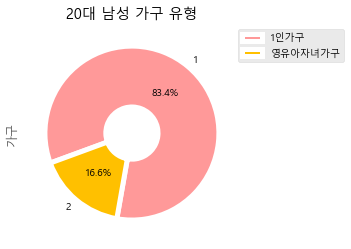

In [6]:
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

credit_m_20.가구.value_counts().plot(kind='pie', autopct='%0.1f%%' , startangle=260,colors=colors, wedgeprops=wedgeprops)
plt.title("20대 남성 가구 유형")
plt.legend(['1인가구','영유아자녀가구'], bbox_to_anchor=(1.5, 1))

20대 남성의 경우 1인가구가 83.4%로 가장 높은 비율을 차지하고 있고 나머지는 영유아자녀가구로 16.6%이다.
<br>
<br>
#### 2) 업종 유형

In [7]:
mark = ['건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업']
trans = ['택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업']
service = ['마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업']
xlist = []
for i in credit_m_20.업종:
    if i in mark:
        xlist.append('소매업')
    elif i in trans:
        xlist.append('운송업')
    elif i in service:
        xlist.append('서비스업')
    
credit_m_20['업종분류'] = xlist

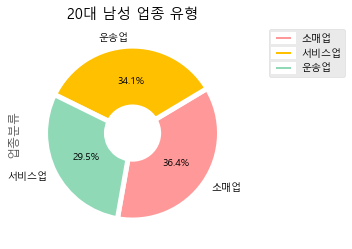

In [8]:
colors = ['#ff9999', '#ffc000','#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

credit_m_20.업종분류.value_counts().plot(kind='pie', autopct='%0.1f%%' , startangle=260,colors=colors, wedgeprops=wedgeprops)
plt.title("20대 남성 업종 유형")
plt.legend(credit_m_20.업종분류.unique(), bbox_to_anchor=(1.5, 1))

소매업이 34.4%로 가장 높고 운송업(34.1%), 서비스업(29.5%)이 그 다음으로 나타난다. 대체적으로 큰 차이가 없음을 보인다.
<br>
<br>
#### 2-1) 소매업

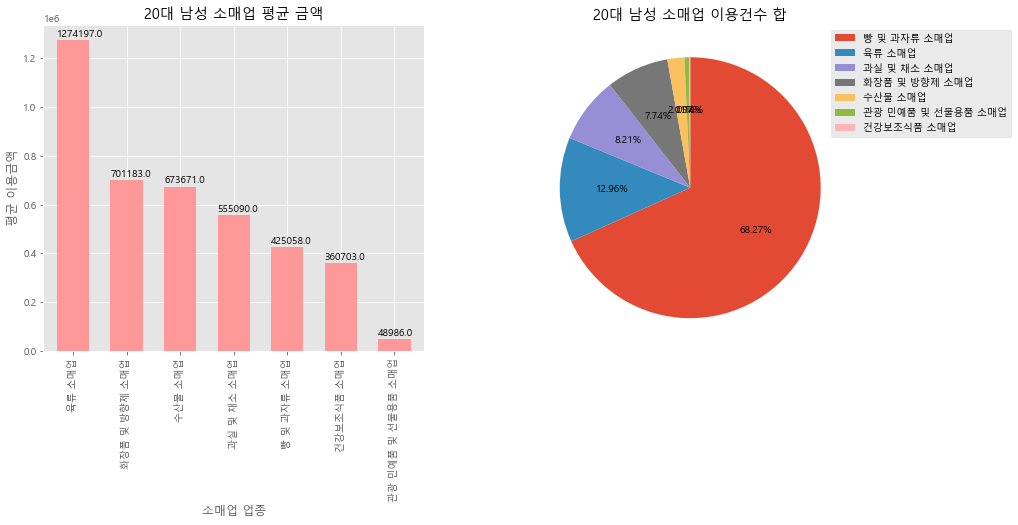

In [13]:
fig = plt.figure(figsize=(15,6)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = credit_m_20[credit_m_20.업종분류=='소매업'].groupby([credit_m_20['업종']])['이용금액'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("20대 남성 소매업 평균 금액")
plt.xlabel('소매업 업종')
plt.ylabel('평균 이용금액')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 15000, str(round(value,0)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = credit_m_20[credit_m_20.업종분류=='소매업'].groupby([credit_m_20['업종']])['이용건수'].sum().sort_values(ascending=False)
plt.title("20대 남성 소매업 이용건수 합")
ax2.pie(mart, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       )
 
plt.legend(mart.index, bbox_to_anchor=(1.5, 1)) ## 범례 표시


In [11]:
mart

업종
빵 및 과자류 소매업          359576
육류 소매업                68289
과실 및 채소 소매업           43249
화장품 및 방향제 소매업         40772
수산물 소매업               11089
관광 민예품 및 선물용품 소매업      3026
건강보조식품 소매업              732
Name: 이용건수, dtype: int64

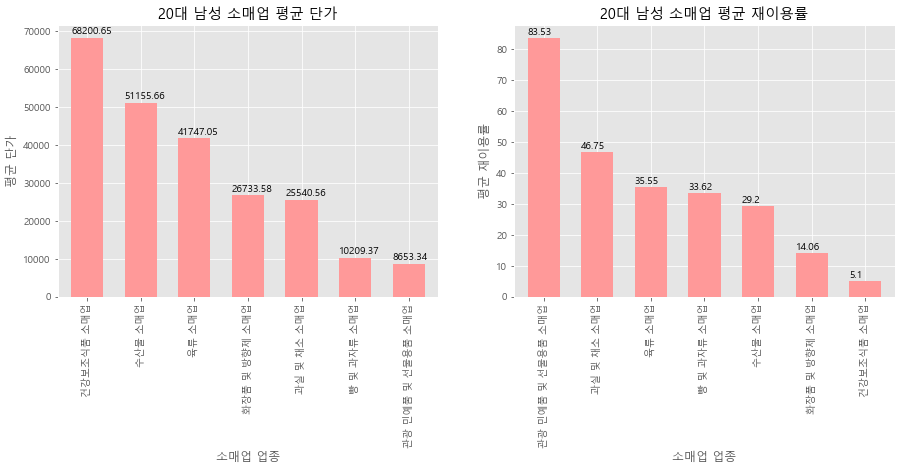

In [223]:
fig = plt.figure(figsize=(15,5)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = credit_m_20[credit_m_20.업종분류=='소매업'].groupby([credit_m_20['업종']])['단가'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("20대 남성 소매업 평균 단가")
plt.xlabel('소매업 업종')
plt.ylabel('평균 단가')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1000, str(round(value,2)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = credit_m_20[credit_m_20.업종분류=='소매업'].groupby([credit_m_20['업종']])['재이용률'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("20대 남성 소매업 평균 재이용률")
plt.xlabel('소매업 업종')
plt.ylabel('평균 재이용률')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import os
os.chdir('C:/Users/ysy92/Desktop/DATA_jeju/data')
credit = pd.read_csv('jeola_drop.csv')
credit.head()

,Unnamed: 0,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류
0,1553,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,1,1,6,791000,6,소매업; 자동차 제외,음·식료품 및 담배 소매업
1,1554,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,2,2,3,199450,3,소매업; 자동차 제외,음·식료품 및 담배 소매업
2,1555,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,1,3,465000,3,소매업; 자동차 제외,음·식료품 및 담배 소매업
3,1556,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,2,36,3538250,40,소매업; 자동차 제외,음·식료품 및 담배 소매업
4,1557,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,2,2,64,6308840,70,소매업; 자동차 제외,음·식료품 및 담배 소매업


In [38]:
credit['단가'] = round((credit.이용금액 / credit.이용건수),2)
credit['재이용률'] = round(((credit.이용건수 - credit.이용고객수) / credit.이용고객수 * 100),2)

In [37]:
credit.head()

,Unnamed: 0,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류,단가,재이용률
0,1553,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,1,1,6,791000,6,소매업; 자동차 제외,음·식료품 및 담배 소매업,131833.33,0.00
1,1554,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,2,2,3,199450,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,66483.33,0.00
2,1555,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,1,3,465000,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,155000.00,0.00
3,1556,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,2,36,3538250,40,소매업; 자동차 제외,음·식료품 및 담배 소매업,88456.25,11.11
4,1557,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,2,2,64,6308840,70,소매업; 자동차 제외,음·식료품 및 담배 소매업,90126.29,9.38


In [39]:

# 20대 여성 데이터 
credit_20 = (credit['성별'] == 2) & (credit['연령대'] == '20s')
credit_20 = credit[credit_20]

set(credit_20['가구']) # 20대 여성 가구 유형은 1, 2


{1, 2}

#### 1.
20대 여성 가구 유형


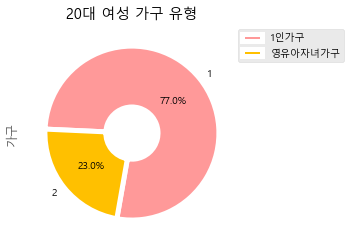

In [40]:
################################################## 1

# 1) 20대 여성 가구 유형
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

credit_20.가구.value_counts().plot(kind='pie', autopct='%0.1f%%' , startangle=260,colors=colors, wedgeprops=wedgeprops)
plt.title("20대 여성 가구 유형")
plt.legend(['1인가구','영유아자녀가구'], bbox_to_anchor=(1.5, 1))


In [41]:
##업종유형

mark = ['건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업']
trans = ['택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업']
service = ['마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업']
xlist = []
for i in credit_20.업종:
    if i in mark:
        xlist.append('소매업')
    elif i in trans:
        xlist.append('운송업')
    elif i in service:
        xlist.append('서비스업')
    
credit_20['업종분류'] = xlist

C:\Users\ysy92\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


#### 2. 여성업종유형
소매업 > 서비스업 > 운송업

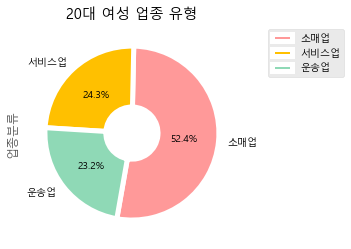

In [42]:
############################################ 2. 여성 업종

colors = ['#ff9999', '#ffc000','#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

credit_20.업종분류.value_counts().plot(kind='pie', autopct='%0.1f%%' , startangle=260, colors=colors, wedgeprops=wedgeprops)
plt.title("20대 여성 업종 유형")
plt.legend(credit_20.업종분류.unique(), bbox_to_anchor=(1.5, 1))

소매업 (52.4%), 운송업(23.2%), 서비스업(24.3%) 순으로 나타난다. 소매업이 가장 우세한 형태를 띤다.

#### 3. - 1) 소매업 : 
여성 소매업 평균 금액 및 이용건수 

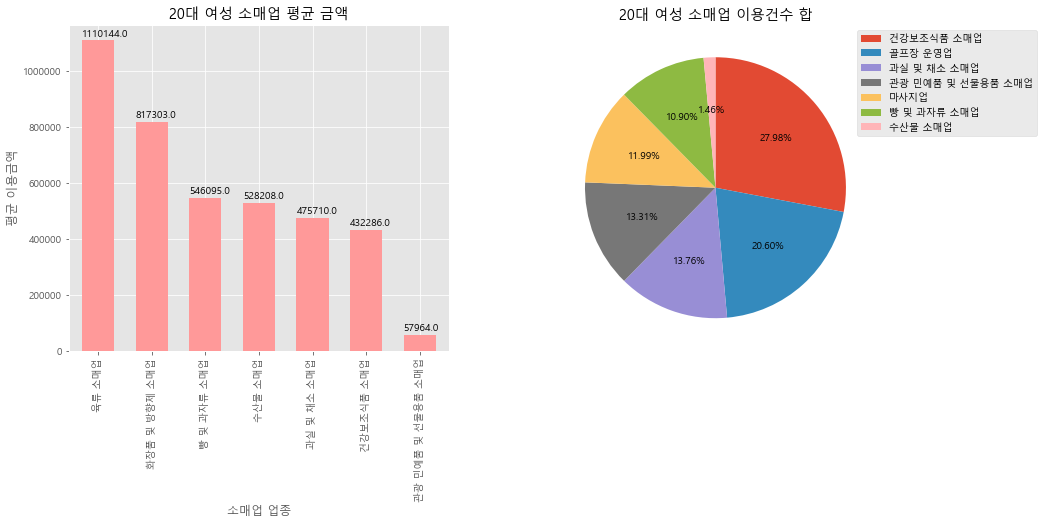

In [54]:
fig = plt.figure(figsize=(15,6)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = credit_20[credit_20.업종분류=='소매업'].groupby([credit_20['업종']])['이용금액'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("20대 여성 소매업 평균 금액")
plt.xlabel('소매업 업종')
plt.ylabel('평균 이용금액')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 15000, str(round(value,0)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
plt.title("20대 여성 소매업 이용건수 합")
ax2.pie(mart, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       )
 
plt.legend(credit_20.업종.unique(), bbox_to_anchor=(1.5, 1)) ## 범례 표시

 - 1) 소매업
20대 여성 소매업 평균 단가 및 재이용률

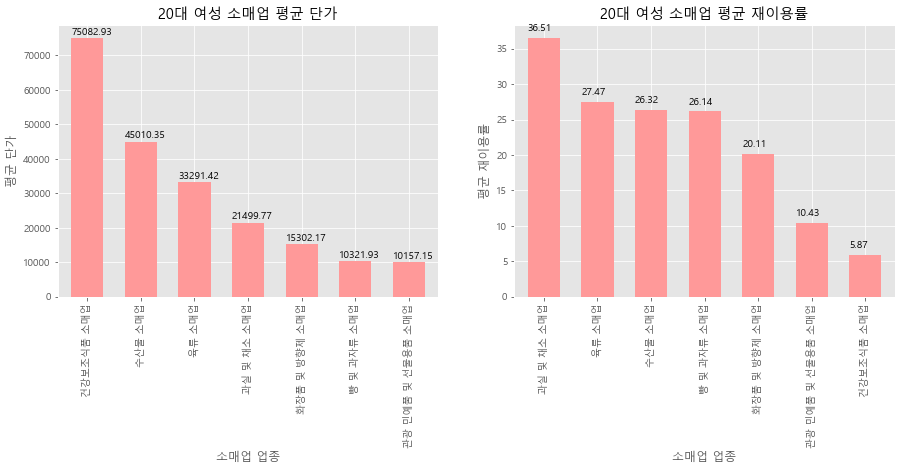

In [56]:

fig = plt.figure(figsize=(15,5)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = credit_20[credit_20.업종분류=='소매업'].groupby([credit_20['업종']])['단가'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("20대 여성 소매업 평균 단가")
plt.xlabel('소매업 업종')
plt.ylabel('평균 단가')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1000, str(round(value,2)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = credit_20[credit_20.업종분류=='소매업'].groupby([credit_20['업종']])['재이용률'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("20대 여성 소매업 평균 재이용률")
plt.xlabel('소매업 업종')
plt.ylabel('평균 재이용률')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text
    
    

 - 20대 여성, 다이어트를 위해 과일, 채소를 주로 섭취하는 특성을 알 수 있다.
    수산물 가격이 높음에도 재이용률이 높다는 건 채소 이용률이 높은 점과 같이 고려하였을 때 비건의 관심도가 높아진 영향이 아닐까 싶음.


In [44]:
########소매업종별 이용 건수 분포

credit_2 = (credit_20['업종분류'] == '소매업')
credit_2 = credit_20[credit_2]
credit_2



,Unnamed: 0,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류,단가,재이용률,업종분류
1,1554,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,2,2,3,199450,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,66483.33,0.00,소매업
28,1581,201901,광주,남구,건강보조식품 소매업,광주,남구,20s,2,1,5,448400,5,소매업; 자동차 제외,음·식료품 및 담배 소매업,89680.00,0.00,소매업
56,1609,201901,광주,동구,건강보조식품 소매업,광주,동구,20s,2,1,3,353000,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,117666.67,0.00,소매업
94,1647,201901,광주,북구,건강보조식품 소매업,광주,북구,20s,2,1,12,424900,12,소매업; 자동차 제외,음·식료품 및 담배 소매업,35408.33,0.00,소매업
107,1660,201901,광주,북구,건강보조식품 소매업,광주,서구,20s,2,1,5,112700,5,소매업; 자동차 제외,음·식료품 및 담배 소매업,22540.00,0.00,소매업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630819,24739749,202004,전북,전주시 완산구,화장품 및 방향제 소매업,전북,정읍시,20s,2,1,8,92200,8,소매업; 자동차 제외,기타 상품 전문 소매업,11525.00,0.00,소매업
630824,24739754,202004,전북,전주시 완산구,화장품 및 방향제 소매업,전북,진안군,20s,2,1,3,18300,3,소매업; 자동차 제외,기타 상품 전문 소매업,6100.00,0.00,소매업
630833,24739763,202004,전북,정읍시,화장품 및 방향제 소매업,전북,정읍시,20s,2,1,84,1637110,94,소매업; 자동차 제외,기타 상품 전문 소매업,17416.06,11.90,소매업
630834,24739764,202004,전북,정읍시,화장품 및 방향제 소매업,전북,정읍시,20s,2,2,27,547300,29,소매업; 자동차 제외,기타 상품 전문 소매업,18872.41,7.41,소매업


credit_20['이용금액'].groupby([credit_20['업종']]).mean().plot(kind='bar' , color='slateblue')   
plt.title('소매업종별 이용 금액 분포')
plt.show()

credit_20['이용건수'].groupby([credit_20['업종']]).sum().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.title('소매업종별 이용 건수 분포')
plt.show()


 - 이건 세영언니 코드 그대로 적용했던 건데 ,, 문제가 발생하였읍니다
    해결 해보려다 못해서 이 부분은 분석하지 않겠습니다 죄송합니다

 ## 3 - 2) 운송업
 

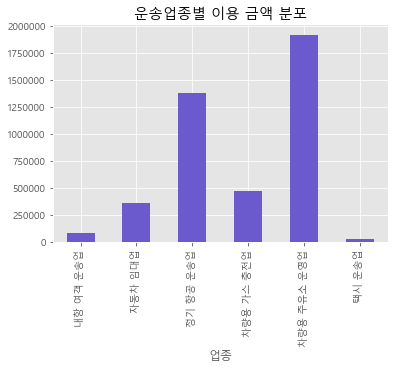

In [47]:
credit_22 = (credit_20['업종분류'] == '운송업')
credit_22 = credit_20[credit_22]
credit_22

credit_22['이용금액'].groupby([credit_22['업종']]).mean().plot(kind='bar' , color='slateblue')   
plt.title('운송업종별 이용 금액 분포')
plt.show()

- 차량용 주유소 운영업 > 정기 항공 운송업 > 차량용 가스 충전업 > 자동차 임대업

- 여행을 즐기는 20대의 경우 항공의 이용이나, 렌트를 통해 차량을 사용한 것으로 볼 수 있다.

- 40대와 동일한 분포를 보임.

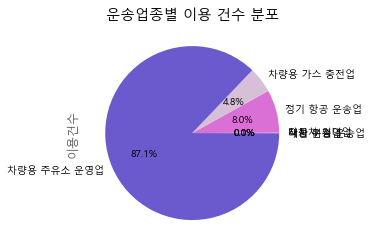

업종
내항 여객 운송업         220
자동차 임대업            25
정기 항공 운송업       24179
차량용 가스 충전업      14505
차량용 주유소 운영업    263806
택시 운송업             74
Name: 이용건수, dtype: int64

In [48]:
credit_22['이용건수'].groupby([credit_22['업종']]).sum().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.title('운송업종별 이용 건수 분포')
plt.show()


credit_22['이용건수'].groupby([credit_22['업종']]).sum()

## 3. - 3) 서비스업

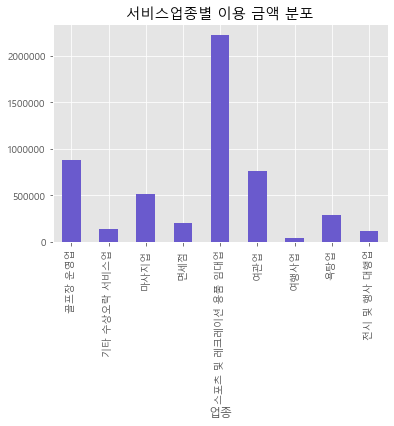

In [49]:
credit_23 = (credit_20['업종분류'] == '서비스업')
credit_23 = credit_20[credit_23]
credit_23

credit_23['이용금액'].groupby([credit_23['업종']]).mean().plot(kind='bar' , color='slateblue')   
plt.title('서비스업종별 이용 금액 분포')
plt.show()

- 스포츠 및 레크레이션 용품 임대업 > 골프장 운영업 > 여관업 > 마사지업 


- 스포츠 및 레크레이션 용품 임대업의 금액이 가장 높았고 골프장 운영업, 여관업, 욕탕업이 뒤를 이었다.

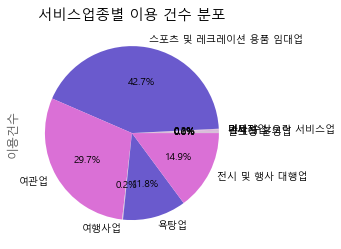

업종
골프장 운영업                 874
기타 수상오락 서비스업             12
마사지업                     95
면세점                     268
스포츠 및 레크레이션 용품 임대업    66487
여관업                   46253
여행사업                    260
욕탕업                   18330
전시 및 행사 대행업           23154
Name: 이용건수, dtype: int64

In [50]:
# 서비스업종별 이용 건수 분포
credit_23['이용건수'].groupby([credit_23['업종']]).sum().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.title('서비스업종별 이용 건수 분포')
plt.show()

credit_23['이용건수'].groupby([credit_23['업종']]).sum()

- 스포츠 레크레이션과 여관업이 20대에서 주로 이용됨을 알 수 있다.
- MT, 여행 숙박 활동이 많은 20대의 특징을 볼 수 있음

Text(0.5, 1.0, '서비스업종별 재방문율 분포')

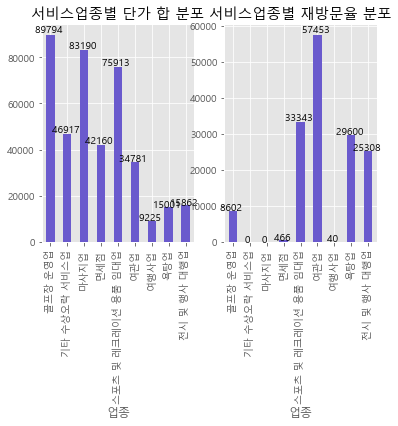

In [53]:
# 서비스업종별 재방문율 분포
plt.subplot(1,2,1);

ax= credit_23['단가'].groupby([credit_23['업종']]).mean().plot(kind='bar' , color='slateblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')

plt.title('서비스업종별 단가 합 분포')

plt.subplot(1,2,2);
ax= credit_23['재이용률'].groupby([credit_23['업종']]).sum().plot(kind='bar',color='slateblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')

plt.title('서비스업종별 재방문율 분포')

- 골프장과 마사지는 방문 대비 높은 비용을 지불하고 이용했음을 알 수 있다.
- 금액 대비 방문이 높은 업종은 여관업, 욕탕업, 전시 및 행사 대행업으로 파악 가능

# 40대 남성

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import os
os.chdir("C:\\Users\\DODO\\Pythonproject\\동아리")
import scipy.stats as stats

In [2]:
credit = pd.read_csv("jeonla_drop.csv").reset_index(drop=True)
credit.head()

,Unnamed: 0,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류
0,1553,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,1,1,6,791000,6,소매업; 자동차 제외,음·식료품 및 담배 소매업
1,1554,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,2,2,3,199450,3,소매업; 자동차 제외,음·식료품 및 담배 소매업
2,1555,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,1,3,465000,3,소매업; 자동차 제외,음·식료품 및 담배 소매업
3,1556,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,2,36,3538250,40,소매업; 자동차 제외,음·식료품 및 담배 소매업
4,1557,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,2,2,64,6308840,70,소매업; 자동차 제외,음·식료품 및 담배 소매업


단가, 재이용률 변수 추가

In [3]:
credit['단가'] = round((credit.이용금액 / credit.이용건수),2)
credit['재이용률'] = round(((credit.이용건수 - credit.이용고객수) / credit.이용고객수 * 100),2)

업종 유형 분류 및 40대 남자 필터링

In [4]:
m40 = credit[credit.연령대 == '40s']
m40 = m40[m40.성별 == 1]
mark = ['건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업']
trans = ['택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업']
service = ['마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업']
xlist = []
for i in m40['업종']:
    if i in mark:
        xlist.append('소매업')
    elif i in trans:
        xlist.append('운송업')
    elif i in service:
        xlist.append('서비스업')
    else: 
        xlist.append('삭제')
m40['업종분류'] = xlist

dr = m40[m40['업종분류'] == '삭제'].index
m40 = m40.drop(dr)
m40.업종분류.unique()

array(['소매업', '서비스업', '운송업'], dtype=object)

## 성별, 연령대 별 특징

#### 1) 40대 남자 가구 유형

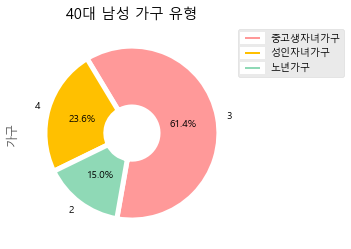

In [5]:
colors = ['#ff9999', '#ffc000','#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

m40.가구.value_counts().plot(kind='pie', autopct='%0.1f%%' , startangle=260,colors=colors, wedgeprops=wedgeprops)
plt.title("40대 남성 가구 유형")
plt.legend(['중고생자녀가구','성인자녀가구','노년가구'], bbox_to_anchor=(1.5, 1))

40대 남성의 경우 중고생자녀가구, 성인자녀가구, 노년가구에 속해있으며, 중고생자녀가구인 경우가 61%로 가장 많다.

#### 2) 업종 유형

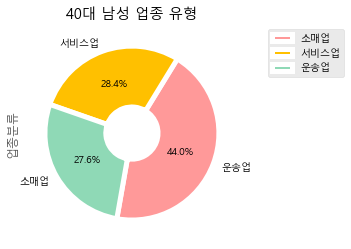

In [6]:
colors = ['#ff9999', '#ffc000','#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

m40.업종분류.value_counts().plot(kind='pie', autopct='%0.1f%%' , startangle=260,colors=colors, wedgeprops=wedgeprops)
plt.title("40대 남성 업종 유형")
plt.legend(m40.업종분류.unique(), bbox_to_anchor=(1.5, 1))

운송업이 44%로 가장 높고, 나머지는 비슷한 수치를 가진다.

#### 2-1) 소매업

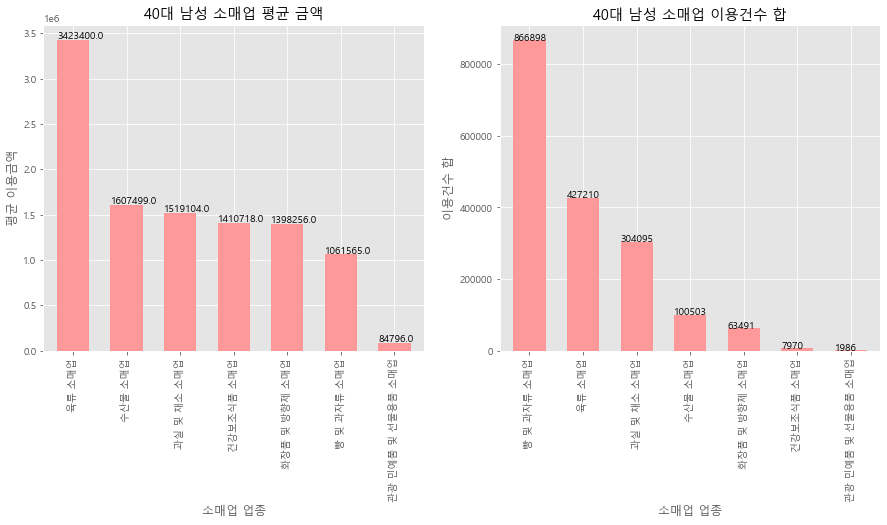

In [7]:
fig = plt.figure(figsize=(15,6)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = m40[m40.업종분류=='소매업'].groupby([m40['업종']])['이용금액'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 소매업 평균 금액")
plt.xlabel('소매업 업종')
plt.ylabel('평균 이용금액')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 15000, str(round(value,0)))  # x 좌표, y 좌표, text

ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = m40[m40.업종분류=='소매업'].groupby([m40['업종']])['이용건수'].sum().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 소매업 이용건수 합")
plt.xlabel('소매업 업종')
plt.ylabel('이용건수 합')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text

#### ＊소매업 평균 금액 
육류 소매업 > 수산물 소매업 > 과실 및 채소 소매업 > 건강 보조 식품 소매업 > 화장품 및 방향제 소매업 > 빵 및 과자류 소매업 > 관광 민예품 및 선물 용품 소매업 

높은 업종: 육류소매업

낮은 업종: 관광 민예품 및 선물 용품 소매업

다른 것들은 대체로 비슷함 

#### ＊소매업 이용 건수 합
빵 및 과자류 소매업 > 육류 소매업 > 과실 및 채소 소매업 > 수산물 소매업 > 화장품 및 방향제 소매업 > 건강 보조 식품 소매업 > 관광 민예품 및 선물 용품 소매업

높은 업종: 빵 및 과자류 소매업(절반 정도 차지) 

낮은 업종: 건강보조식품 소매업, 관광 민예품 및 선물 용품 소매업

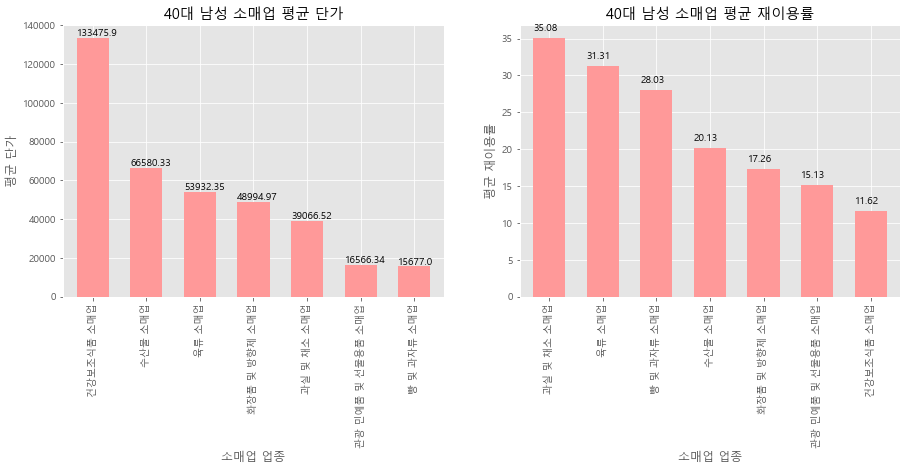

In [8]:
fig = plt.figure(figsize=(15,5)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = m40[m40.업종분류=='소매업'].groupby([m40['업종']])['단가'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 소매업 평균 단가")
plt.xlabel('소매업 업종')
plt.ylabel('평균 단가')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1000, str(round(value,2)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = m40[m40.업종분류=='소매업'].groupby([m40['업종']])['재이용률'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 소매업 평균 재이용률")
plt.xlabel('소매업 업종')
plt.ylabel('평균 재이용률')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text

#### ＊소매업 평균 단가
건강보조식품 소매업 > 수산물 소매업 > 육류 소매업 > 화장품 및 방향제 소매업 > 과실 및 채소 소매업 > 관광 민예품 및 선물용품 소매업 > 빵 및 과자류 소매업 

높은 업종: 건강보조식품 소매업(다른 업종의 2배 정도 높음)

낮은 업종:관광 민예품 및 선물 용품 소매업, 빵 및 과자류 소매업

#### ＊소매업 평균 재이용률
과실 및 소매업 > 육류 소매업 > 빵 및 과자류 소매업 > 수산물 소매업 > 화장품 및 방향제 소매업 > 관광 민예품 및 선물용품 소매업 > 건강보조식품 소매업 

높은 업종: 식료품 관련 소매업들

낮은 업종: 건강보조식품 소매업, 관광 민예품, 선물 용품 소매업

건강 보조 식품 소매업은 이용건수와 재이용률이 낮았으나 평균 단가가 높았다. 이로 볼때 자주 이용하는 업종은 아니지만 한번 소비할때 많은 소비가 발생함을 알 수 있다.

#### 2-2) 서비스업 

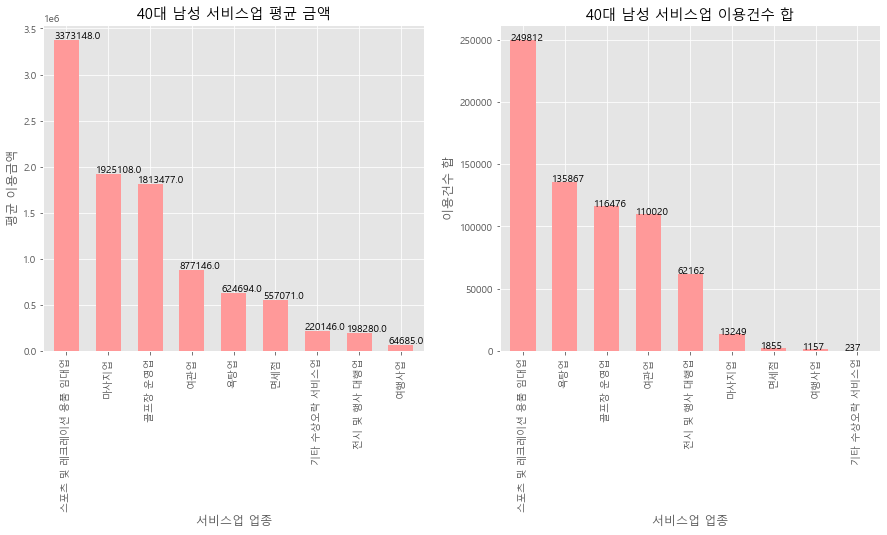

In [9]:
fig = plt.figure(figsize=(15,6)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = m40[m40.업종분류=='서비스업'].groupby([m40['업종']])['이용금액'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 서비스업 평균 금액")
plt.xlabel('서비스업 업종')
plt.ylabel('평균 이용금액')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 15000, str(round(value,0)))  # x 좌표, y 좌표, text

ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = m40[m40.업종분류=='서비스업'].groupby([m40['업종']])['이용건수'].sum().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 서비스업 이용건수 합")
plt.xlabel('서비스업 업종')
plt.ylabel('이용건수 합')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text

#### * 서비스업 평균 금액
스포츠 및 레크레이션 용품 임대업 > 마사지업 > 골프장 운영업 > 여관업 > 욕탕업 > 면세점 > 기타 수상오락 서비스업 > 전시 및 행사 대행업 > 여행사업 

높은 업종: 스포츠 및 레크레이션 용품 임대

낮은 업종: 기타 수상 오락 서비스업, 전시 및 행사 대행업, 여행사업

#### *서비스업 이용건수 합
스포츠 및 레크레이션 용품 임대업 > 욕탕업 > 골프장 운영업 > 여관업 > 전시 및 행사 대행업 > 마사지업 > 면세점 > 여행사업 > 기타 수상오락 서비스업

높은 업종: 스포츠 및 레크레이션 용품 임대업

낮은 업종: 면세점, 여행사업, 기타 수상오락 서비스업


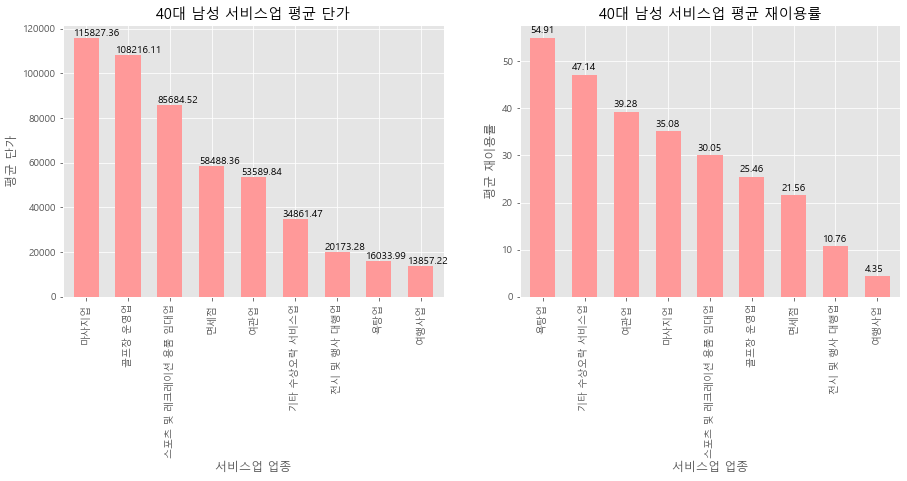

In [10]:
fig = plt.figure(figsize=(15,5)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = m40[m40.업종분류=='서비스업'].groupby([m40['업종']])['단가'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 서비스업 평균 단가")
plt.xlabel('서비스업 업종')
plt.ylabel('평균 단가')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1000, str(round(value,2)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = m40[m40.업종분류=='서비스업'].groupby([m40['업종']])['재이용률'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 서비스업 평균 재이용률")
plt.xlabel('서비스업 업종')
plt.ylabel('평균 재이용률')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text

#### *서비스업 평균 단가
마사지업 > 골프장 운영업 > 스포츠 및 레크레이션 용품 임대업 > 면세점 > 여관업 > 기타 수상오락 서비스업 > 전시 및 행사 대행업 > 욕탕업 > 여행사업 

높은 업종: 마사지업, 골프장 운영업

낮은 업종: 욕탕업, 여행사업

#### *서비스업 평균 재이용률
욕탕업 > 기타 수상오락 서비스업 > 여관업 > 마사지업 > 스포츠 및 레크레이션 용품 임대업 > 골프장 운영업 > 면세점 > 전시 및 행사 대행업 > 여행사업

높은 업종: 욕탕업, 기타 수상오락 서비스업

낮은 업종:  전시 및 행사 대행업, 여행사업


욕탕업은 이용단가가 낮지만 이용건수 합과 재이용률에서 높은 수치를 보였기에 단가가 낮지만 자주 이용하는 업종이라고 볼 수 있다.

기타 수상오락 서비스업은 이용건수가 적었지만, 재이용률에서 높은 수치를 보였기에 특정 사람들만 이용하는 업종이라고 볼 수 있다.



#### 2-3) 운송업 

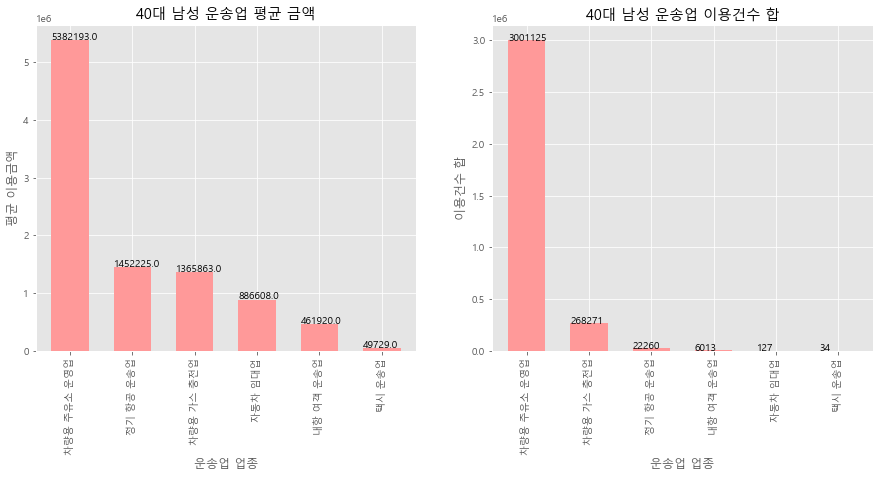

In [11]:
fig = plt.figure(figsize=(15,6)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = m40[m40.업종분류=='운송업'].groupby([m40['업종']])['이용금액'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 운송업 평균 금액")
plt.xlabel('운송업 업종')
plt.ylabel('평균 이용금액')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 15000, str(round(value,0)))  # x 좌표, y 좌표, text

ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = m40[m40.업종분류=='운송업'].groupby([m40['업종']])['이용건수'].sum().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 운송업 이용건수 합")
plt.xlabel('운송업 업종')
plt.ylabel('이용건수 합')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text

#### *운송업 평균 금액: 차량용 주유소 운영업 > 정기 항공 운송업 > 차량용 가스 충전업 > 자동차 임대업 > 내항 여객 운송업 > 택시 운송업

높은 업종: 차량용 주유소 운영업

낮은 업종:  택시 운송업

#### *운송업 이용건수 합: 차량용 주유소 운영업 > 차량용 가스 충전업 > 정기 항공 운송업 > 내항 여객 운송업 > 자동차 임대업 > 택시 운송업

높은 업종: 차량용 주유소 운영업

낮은 업종:  나머지 업종




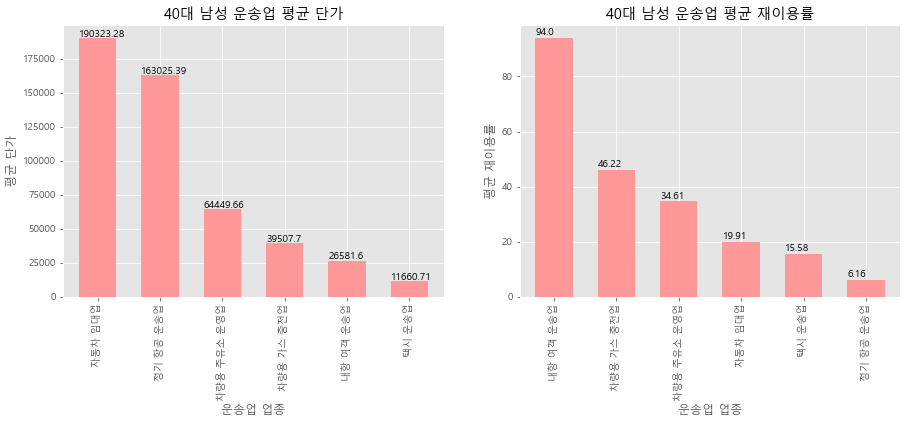

In [12]:
fig = plt.figure(figsize=(15,5)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = m40[m40.업종분류=='운송업'].groupby([m40['업종']])['단가'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 운송업 평균 단가")
plt.xlabel('운송업 업종')
plt.ylabel('평균 단가')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1000, str(round(value,2)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = m40[m40.업종분류=='운송업'].groupby([m40['업종']])['재이용률'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("40대 남성 운송업 평균 재이용률")
plt.xlabel('운송업 업종')
plt.ylabel('평균 재이용률')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text

#### *평균 단가
자동차 입대업 > 정기 항공 운송업 > 차량용 주유소 운영업 > 차량용 가스 충전업 > 내항 여객 운송업 > 택시 운송업 

높은 업종: 자동차 임대업, 정기 항공 운송업

낮은 업종:  택시 운송업

#### *평균 재이용률
내항 여객 운송업 > 차량용 가스 충전업 > 차량용 주유소 운영업 > 자동차 임대업 > 택시 운송업 > 정기 항공 운송업 

높은 업종: 내항 여객 운송업

낮은 업종:  정기 항공 운송업

차량용 주유소 운영업의 평균 금액과 이용건수 합이 다른 업종에 비해 높은 수치를 보였고, 이에 비해 택시 운송업은 모든 부분에서 낮은 수치를 보였다. 따라서 40대 남성들은 주로 자가용을 많이 사용한다는 것을 알 수 있다. 

내항 여객 운송업의 경우 평균 금액과 이용건수는 별로 높지 않았는데, 재이용률에서 높은 수치를 보였기에 특정 사람만 이용하는 업종임을 알 수 있다.

## 전라도 지역 코로나 전후 산업동향 파악 보고서
### D.N.A

- 주제:
  - 전라도 지역의 코로나 전후 산업 동향을 파악 및 지역 경제 활성화 방안 추진


- 데이터 설명:
  - 활용 데이터: 제주 신용카드 빅데이터 활용
  - jeonla.csv: 2019.01 ~ 2020.04 기간 내 전라도 지역 신용카드 사용 내역 데이터

|변수|설명|
|------|---|
|REG_YYMM|년/월|
|CARD_SIDO_NM| 카드이용지역_시도(가맹점 주소 기준)|
|CARD_CCG_NM| 카드이용지역_시군구(가맹점 주소 기준)|
|STD_CLSS_NM|업종명|
|HOM_SIDO_NM|거주지역_시도(고객 집주소 기준)|
|HOM_CCG_NM|거주지역_시군구(고객집주소 기준)|
|AGE|연령대(10s~70s)|
|SEX_CTGO_CD|성별(남:1 ,여:2)|
|FLC|가구 생애주기<br> (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가 구, 5: 노년가구)|
|CSTMR_CNT|이용 고객수(명)|
|AMT|이용금액(원)|
|CNT|이용건수(건)|

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import os
os.chdir(r'C:\Users\syp97\Desktop\jeonla')

credit = pd.read_csv("jeonla.csv")
credit.head()
credit.drop('Unnamed: 0', axis =1,inplace = True)
credit.reset_index(drop=True)

#원본 자료 지키기
df = credit.copy()
df

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류
0,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,1,1,6,791000,6,소매업; 자동차 제외,음·식료품 및 담배 소매업
1,201901,광주,광산구,건강보조식품 소매업,광주,광산구,20s,2,2,3,199450,3,소매업; 자동차 제외,음·식료품 및 담배 소매업
2,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,1,3,465000,3,소매업; 자동차 제외,음·식료품 및 담배 소매업
3,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,1,2,36,3538250,40,소매업; 자동차 제외,음·식료품 및 담배 소매업
4,201901,광주,광산구,건강보조식품 소매업,광주,광산구,30s,2,2,64,6308840,70,소매업; 자동차 제외,음·식료품 및 담배 소매업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177805,202003,전북,군산시,정기 항공 운송업,충북,청주시 흥덕구,50s,2,4,6,81000,5,항공 운송업,항공 여객 운송업
2177806,202003,전북,군산시,정기 항공 운송업,충북,충주시,20s,2,1,3,252000,3,항공 운송업,항공 여객 운송업
2177807,202003,전북,군산시,정기 항공 운송업,충북,충주시,50s,1,4,4,2203000,3,항공 운송업,항공 여객 운송업
2177808,202004,전북,군산시,정기 항공 운송업,서울,강서구,30s,1,2,4,335600,2,항공 운송업,항공 여객 운송업


### 전라도 지역 40대 여성 소비 동향 파악

In [2]:
idx = df[(df.업종 == '그외 기타 스포츠시설 운영업') |(df.업종 == '그외 기타 종합 소매업') | (df.업종== '기타 대형 종합 소매업') |
         (df.업종 == '비알콜 음료점업') |(df.업종 ==  '기타 주점업') | (df.업종 == '기타음식료품위주종합소매업') |
         (df.업종 == '기타 외국식 음식점업') |(df.업종 ==  '서양식 음식점업') |(df.업종 == '슈퍼마켓') |
         (df.업종 == '육류 소매업') |(df.업종 == '일반유흥 주점업') |(df.업종 ==  '일식 음식점업') |
         (df.업종 == '중식 음식점업') |(df.업종 == '체인화 편의점') |(df.업종 == '피자 햄버거 샌드위치 및 유사 음식점업') |
        (df.업종 == '한식 음식점업')].index
df =df.drop(idx)
df = df[(df.연령대 == '40s')].reset_index(drop=True)
df = df[(df.성별 == 2)].reset_index(drop = True)
df

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류
0,201901,광주,광산구,건강보조식품 소매업,광주,광산구,40s,2,3,44,6017950,46,소매업; 자동차 제외,음·식료품 및 담배 소매업
1,201901,광주,광산구,건강보조식품 소매업,광주,남구,40s,2,3,3,90550,3,소매업; 자동차 제외,음·식료품 및 담배 소매업
2,201901,광주,광산구,건강보조식품 소매업,광주,북구,40s,2,3,3,169000,4,소매업; 자동차 제외,음·식료품 및 담배 소매업
3,201901,광주,남구,건강보조식품 소매업,광주,남구,40s,2,2,4,334700,4,소매업; 자동차 제외,음·식료품 및 담배 소매업
4,201901,광주,남구,건강보조식품 소매업,광주,남구,40s,2,3,43,3875300,43,소매업; 자동차 제외,음·식료품 및 담배 소매업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58788,202003,전북,군산시,정기 항공 운송업,제주,서귀포시,40s,2,3,7,218000,7,항공 운송업,항공 여객 운송업
58789,202003,전북,군산시,정기 항공 운송업,제주,제주시,40s,2,2,18,3532,13,항공 운송업,항공 여객 운송업
58790,202003,전북,군산시,정기 항공 운송업,제주,제주시,40s,2,3,63,1150510,36,항공 운송업,항공 여객 운송업
58791,202003,전북,군산시,정기 항공 운송업,충남,천안시 동남구,40s,2,3,4,531860,3,항공 운송업,항공 여객 운송업


#### 1. 가구 유형

In [3]:
df['가구'].unique()
#자료 변형
#1. 연령대 숫자형으로
df['가구'] = df['가구'].astype('str')
df.가구.unique()

array(['3', '2', '4'], dtype=object)

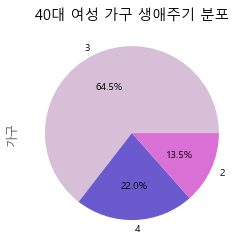

In [4]:
df['가구'].value_counts().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.title('40대 여성 가구 생애주기 분포')
plt.show()

- 중고생 자녀가구(64.5&)의 비율이 절반을 넘으며 가장 높았고, 성인 자녀가구 (22.0%), 영유아가구(13.5%)가 그 뒤를 이었다.

#### 2. 업종 분류

#### * 업종 분류별 비율 차트
- 소매업 vs 운송업 vs 서비스업
  - 소매업 : '건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업'
  
  - 운송업 : '택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업'
  
  - 서비스 : '마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업'

In [5]:
mark = ['건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업']
trans = ['택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업']
service = ['마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업']
xlist = []
for i in df['업종']:
    if i in mark:
        xlist.append('소매업')
    elif i in trans:
        xlist.append('운송업')
    elif i in service:
        xlist.append('서비스업')
    else: 
        xlist.append('삭제')
df['업종분류'] = xlist

dr = df[df['업종분류'] == '삭제'].index
df = df.drop(dr)

In [34]:
set(df['업종분류'])

{'서비스업', '소매업', '운송업'}

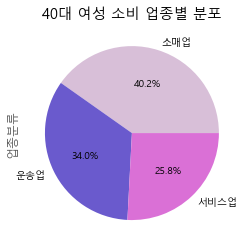

In [6]:
df['업종분류'].value_counts().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.title('40대 여성 소비 업종별 분포')
plt.show()

- 소매업의 비율이 40.2로 가장 높았고, 운송업의 비율이 34.0%로 그 뒤를 이었다. 40대 여성이 가장 적게 소비하는 업종은 서비스업으로 25.8%를 차지했다.

#### * 업종 분류별 이용금액 분포

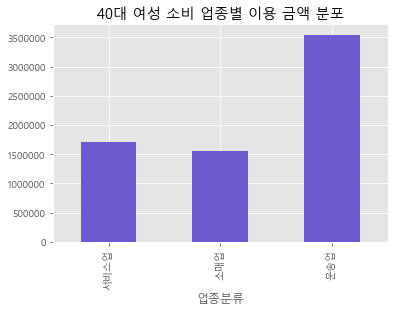

In [7]:
df['이용금액'].groupby([df['업종분류']]).mean().plot(kind='bar' , color='slateblue')
plt.title('40대 여성 소비 업종별 이용 금액 분포')
plt.show()

- 40대 여성은 주로 운송업에 이용 금액이 높고 그 다음은 서비스업, 소매업순으로 이용 금액이 높다.

#### * 업종 분류별 이용 건수 분포

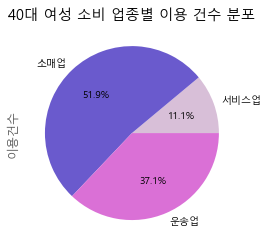

In [8]:
df['이용건수'].groupby([df['업종분류']]).sum().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.title('40대 여성 소비 업종별 이용 건수 분포')
plt.show()

- 이용건수는 소매업이 과반수를 넘는 51.9%로 가장 많았으며, 운송업과 서비스업이 그 뒤를 따랐다.

#### * 업종 분류별 단가 분포
- 단가는 '단위상품 당 가격'을 뜻한다. 만약 시장에서 하나의 상품만 거래된다면 가격과 단가는 같은 말이 된다. 통계를 집계할 때는 가격과 반대 방법으로 구한다. 단가를 구하기 위해서는 먼저 수출액, 판매액 등 '총 금액'을 집계한다. 이후 판매량, 수출물량 등 물량으로 나눠주면 단가가 산출된다.


- 단가 = 이용금액 / 이용건수

In [10]:
df['단가'] = df['이용금액']/df['이용건수']
df

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류,업종분류,단가
0,201901,광주,광산구,건강보조식품 소매업,광주,광산구,40s,2,3,44,6017950,46,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,130825.000000
1,201901,광주,광산구,건강보조식품 소매업,광주,남구,40s,2,3,3,90550,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,30183.333333
2,201901,광주,광산구,건강보조식품 소매업,광주,북구,40s,2,3,3,169000,4,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,42250.000000
3,201901,광주,남구,건강보조식품 소매업,광주,남구,40s,2,2,4,334700,4,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,83675.000000
4,201901,광주,남구,건강보조식품 소매업,광주,남구,40s,2,3,43,3875300,43,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,90123.255814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58788,202003,전북,군산시,정기 항공 운송업,제주,서귀포시,40s,2,3,7,218000,7,항공 운송업,항공 여객 운송업,운송업,31142.857143
58789,202003,전북,군산시,정기 항공 운송업,제주,제주시,40s,2,2,18,3532,13,항공 운송업,항공 여객 운송업,운송업,271.692308
58790,202003,전북,군산시,정기 항공 운송업,제주,제주시,40s,2,3,63,1150510,36,항공 운송업,항공 여객 운송업,운송업,31958.611111
58791,202003,전북,군산시,정기 항공 운송업,충남,천안시 동남구,40s,2,3,4,531860,3,항공 운송업,항공 여객 운송업,운송업,177286.666667


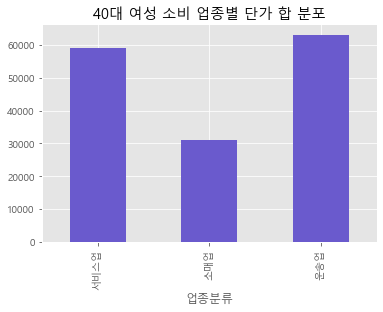

In [12]:
df['단가'].groupby([df['업종분류']]).mean().plot(kind='bar' , color='slateblue')
plt.title('40대 여성 소비 업종별 단가 합 분포')
plt.show()

- 상품의 단가는 운송업이 가장 크고 소매업이 한 가격당 평균 단가가 가장 낮다.

#### * 업종 분류별 재이용률 분포
- 재이용률 = (이용건수 - 이용고객수) / 이용고객수 * 100

In [19]:
df['재이용률'] = 1-  df['이용고객수']/df['이용건수']
df

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류,업종분류,단가,재이용률
0,201901,광주,광산구,건강보조식품 소매업,광주,광산구,40s,2,3,44,6017950,46,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,130825.000000,0.043478
1,201901,광주,광산구,건강보조식품 소매업,광주,남구,40s,2,3,3,90550,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,30183.333333,0.000000
2,201901,광주,광산구,건강보조식품 소매업,광주,북구,40s,2,3,3,169000,4,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,42250.000000,0.250000
3,201901,광주,남구,건강보조식품 소매업,광주,남구,40s,2,2,4,334700,4,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,83675.000000,0.000000
4,201901,광주,남구,건강보조식품 소매업,광주,남구,40s,2,3,43,3875300,43,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,90123.255814,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58788,202003,전북,군산시,정기 항공 운송업,제주,서귀포시,40s,2,3,7,218000,7,항공 운송업,항공 여객 운송업,운송업,31142.857143,0.000000
58789,202003,전북,군산시,정기 항공 운송업,제주,제주시,40s,2,2,18,3532,13,항공 운송업,항공 여객 운송업,운송업,271.692308,-0.384615
58790,202003,전북,군산시,정기 항공 운송업,제주,제주시,40s,2,3,63,1150510,36,항공 운송업,항공 여객 운송업,운송업,31958.611111,-0.750000
58791,202003,전북,군산시,정기 항공 운송업,충남,천안시 동남구,40s,2,3,4,531860,3,항공 운송업,항공 여객 운송업,운송업,177286.666667,-0.333333


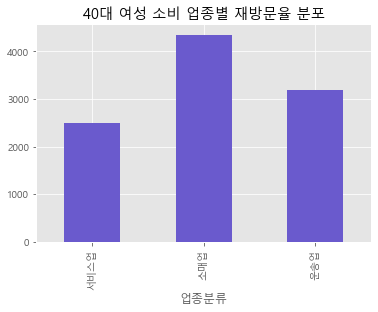

In [20]:
df['재이용률'].groupby([df['업종분류']]).sum().plot(kind='bar',color='slateblue')
plt.title('40대 여성 소비 업종별 재방문율 분포')
plt.show()

- 재방문율을 예상했던 것과 마찬가지로 소매업이 가장 컸고 그다음이 운송업, 서비스업이었다.


- 서비스업의 단가가 비교적 높고 이용건수도 낮기 때문에 이와 같은 분포가 나타나지 않았을가 생각한다.

#### 3. 소매업 동향 파악
-  소매업 : '건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업'
  

In [22]:
df1 = (df['업종분류'] == '소매업')
df1 = df[df1]
df1

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류,업종분류,단가,재이용률
0,201901,광주,광산구,건강보조식품 소매업,광주,광산구,40s,2,3,44,6017950,46,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,130825.000000,0.043478
1,201901,광주,광산구,건강보조식품 소매업,광주,남구,40s,2,3,3,90550,3,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,30183.333333,0.000000
2,201901,광주,광산구,건강보조식품 소매업,광주,북구,40s,2,3,3,169000,4,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,42250.000000,0.250000
3,201901,광주,남구,건강보조식품 소매업,광주,남구,40s,2,2,4,334700,4,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,83675.000000,0.000000
4,201901,광주,남구,건강보조식품 소매업,광주,남구,40s,2,3,43,3875300,43,소매업; 자동차 제외,음·식료품 및 담배 소매업,소매업,90123.255814,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56466,202004,전북,정읍시,화장품 및 방향제 소매업,전북,정읍시,40s,2,2,19,356950,23,소매업; 자동차 제외,기타 상품 전문 소매업,소매업,15519.565217,0.173913
56467,202004,전북,정읍시,화장품 및 방향제 소매업,전북,정읍시,40s,2,3,66,2469990,71,소매업; 자동차 제외,기타 상품 전문 소매업,소매업,34788.591549,0.070423
56468,202004,전북,정읍시,화장품 및 방향제 소매업,전북,정읍시,40s,2,4,53,2006970,59,소매업; 자동차 제외,기타 상품 전문 소매업,소매업,34016.440678,0.101695
56469,202004,전북,진안군,화장품 및 방향제 소매업,전북,진안군,40s,2,3,3,53000,4,소매업; 자동차 제외,기타 상품 전문 소매업,소매업,13250.000000,0.250000


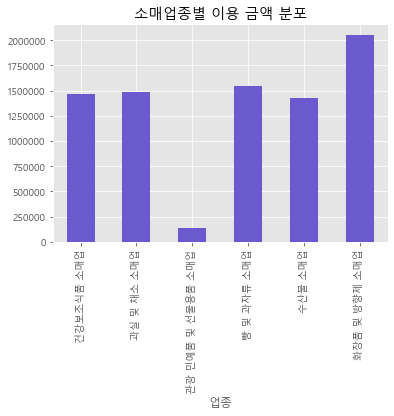

In [46]:
df1['이용금액'].groupby([df1['업종']]).mean().plot(kind='bar' , color='slateblue')   
plt.title('소매업종별 이용 금액 분포')
plt.show()

- 화장품 및 방향제 소매업 > 빵 및 과자류 소매업 > 과실 및 채소 소매업


- 화장품 및 방향제 소매업을 제외하고선 식과 관련된 소매업의 순위가 비슷했고, 관광 민예품 및 선물 용품 소매업에 이용하는 금액은 현저히 낮았다.

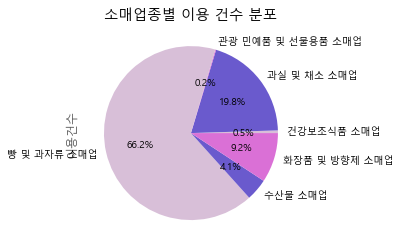

In [47]:
df1['이용건수'].groupby([df1['업종']]).sum().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.titldf1e('소매업종별 이용 건수 분포')
plt.show()

- 빵 및 과자류 소매업 > 과실 및 채소 소매업 > 화장품 및 방향제 소매업> 수산물 소매업


- 건강 보조 식품 소매업과 관광 민예품 및 선물 용품 소매업은 현저히 낮은 비율을 보였다. 관광 민예품 및 선물 용품 소매업은 이용 금액의 수치도 낮았으며 이용건수가 낮으니 이용하는 금액의 분포도 낮은 것으로 확인 가능하다.


- 화장품 및 방향제 소매업: 이용 금액이 매우 큰데, 이용 건수는 3위 정도로 빵 및 과자류 소매업과 차이가 크다. 이용 건수는 크지 않지만 이용 금액이 큰 것은 한번에 많은 양의 화장품을 사거나 화장품의 단가가 높아서일 것이므로 단가 역시 확인할 필요가 있어 보인다.

Text(0.5, 1.0, '소매업종별 재방문율 분포')

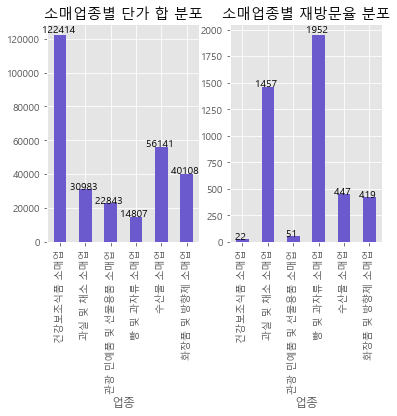

In [44]:
plt.subplot(1,2,1);

ax= df1['단가'].groupby([df1['업종']]).mean().plot(kind='bar' , color='slateblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')

plt.title('소매업종별 단가 합 분포')

plt.subplot(1,2,2);
ax= df1['재이용률'].groupby([df1['업종']]).sum().plot(kind='bar',color='slateblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')

plt.title('소매업종별 재방문율 분포')

- 단가:
  - 건강 보조 식품 소매업 > 수산물 소매업 > 화장품 및 방향제 소매업 > 과실 및 채소 소매업 > 관광 및 선물 용품 소매업
  
  - 상식적으로 단가가 높다고 생각되는 건강 보조 식품이 확실히 다른 업종의 2배 넘게 1위를 차지한다.
  
  - 위에서 화장품의 단가가 높아서 이용 금액이 높은 것이라고 생각되었는데 그래프로 확인해보니 단가가 높다고 보기 어렵기 때문에 한번에  한번 살때 많은 양의 화장품을 사는 것이라고 추론한다. (이를 비교할 수 있느 정확한 지표에 대한 고민이 필요할 것으로 생각됨)
  
  - 수산물 소매업 (날짜별 추이 확인 필요)


- 재방문율:
  - 빵 및 과자류 소매업 > 과실 및 채소 소매업 > 수산물 소매업> 화장품 및 방향제 소매업 > 관광 민예품 및 선물 용품 소매업 > 건강 보조 식품 소매업
  
  - 식과 관련된 소매업들의 재방문율이 높았고, 일회성에 그치는 관광과 관련된 소매업은 하위권에 머물렀다. 단가가 높은 편인 건강 보조 식품 소매업이 가장 재방문률이 낮았으며 수산물 소매업, 화장품 및 방향제 소매업도 재방문율이 타 소매업에 비해 높지 않았다.

#### 4. 운송업 동향 파악
- 운송업 : '택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업'

In [48]:
df2 = (df['업종분류'] == '운송업')
df2 = df[df2]
df2

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류,업종분류,단가,재이용률
35406,201901,광주,광산구,차량용 가스 충전업,광주,광산구,40s,2,2,28,1580342,60,"전기, 가스, 증기 및 공기조절 공급업",연료용 가스 제조 및 배관공급업,운송업,26339.033333,0.533333
35407,201901,광주,광산구,차량용 가스 충전업,광주,광산구,40s,2,3,347,15598482,507,"전기, 가스, 증기 및 공기조절 공급업",연료용 가스 제조 및 배관공급업,운송업,30766.236686,0.315582
35408,201901,광주,광산구,차량용 가스 충전업,광주,광산구,40s,2,4,30,1440620,46,"전기, 가스, 증기 및 공기조절 공급업",연료용 가스 제조 및 배관공급업,운송업,31317.826087,0.347826
35409,201901,광주,광산구,차량용 가스 충전업,광주,남구,40s,2,3,23,1270069,41,"전기, 가스, 증기 및 공기조절 공급업",연료용 가스 제조 및 배관공급업,운송업,30977.292683,0.439024
35410,201901,광주,광산구,차량용 가스 충전업,광주,동구,40s,2,3,9,298759,10,"전기, 가스, 증기 및 공기조절 공급업",연료용 가스 제조 및 배관공급업,운송업,29875.900000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58788,202003,전북,군산시,정기 항공 운송업,제주,서귀포시,40s,2,3,7,218000,7,항공 운송업,항공 여객 운송업,운송업,31142.857143,0.000000
58789,202003,전북,군산시,정기 항공 운송업,제주,제주시,40s,2,2,18,3532,13,항공 운송업,항공 여객 운송업,운송업,271.692308,-0.384615
58790,202003,전북,군산시,정기 항공 운송업,제주,제주시,40s,2,3,63,1150510,36,항공 운송업,항공 여객 운송업,운송업,31958.611111,-0.750000
58791,202003,전북,군산시,정기 항공 운송업,충남,천안시 동남구,40s,2,3,4,531860,3,항공 운송업,항공 여객 운송업,운송업,177286.666667,-0.333333


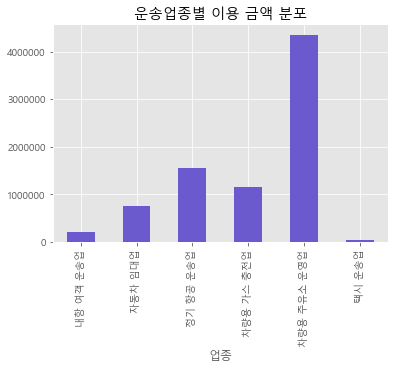

In [58]:
df2['이용금액'].groupby([df2['업종']]).mean().plot(kind='bar' , color='slateblue')   
plt.title('운송업종별 이용 금액 분포')
plt.show()

- 차량용 주유소 운영업 > 정기 항공 운송업 > 차량용 가스 충전업 > 자동차 임대업


- 차량용 주유소 운영업이 돋보적으로 높은 것을 확인할 수 있다. -> 실생활과 관련되어 있고, 40대는 자차를 가지고 있을 확률이 상대적으로 높다는 것을 추론해 볼 수 있다.


- 택시 운송업이 매우 낮은 것을 확인할 수 있는데 중장년층인 40대는 자차를 가지고 있을 확률이 더 높을 것으로 생각되며 택시를 이용할 확률이 20대, 30대에 비해 상대적으로 낮을 것이라고 추측된다. 또한 택시는 소액 결제에 해당하므로, 신용카드 대신 체크카드나 현금 같은 다른 결제 수단을 썼을 확률도 있다고 생각이 된다.

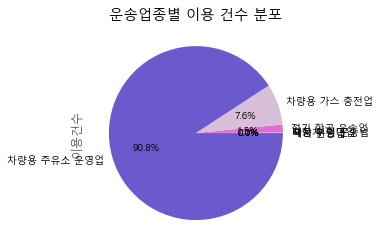

업종
내항 여객 운송업         1509
자동차 임대업             32
정기 항공 운송업        19750
차량용 가스 충전업      102914
차량용 주유소 운영업    1224089
택시 운송업              27
Name: 이용건수, dtype: int64

In [63]:
df2['이용건수'].groupby([df2['업종']]).sum().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.title('운송업종별 이용 건수 분포')
plt.show()

#업종의 이용건수가 너무 낮아 그래프로 보기 보단 수치로 보는게 나을 것 같음.
df2['이용건수'].groupby([df2['업종']]).sum()

- 차량용 주유소 운영업 > 차량용 가스 충전업 > 정기 항공 운송업 > 내항 여객 운송업


- 이용금액과 마찬가지로 차량용 주유소 운영업이 매우 높은 비율로 많이 이용됨을 확인할 수 있다. 실생활과 연관이 높기 때문이라 생각이 들고 차량용 가스 충전업 역시 같은 맥락이라고 생각이 된다.

Text(0.5, 1.0, '운송업종별 재방문율 분포')

C:\Users\syp97\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\syp97\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


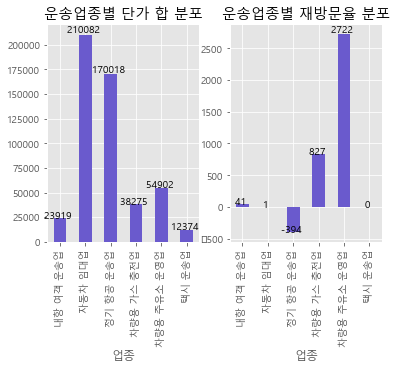

In [56]:
plt.subplot(1,2,1);

ax= df2['단가'].groupby([df2['업종']]).mean().plot(kind='bar' , color='slateblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')

plt.title('운송업종별 단가 합 분포')

plt.subplot(1,2,2);
ax= df2['재이용률'].groupby([df2['업종']]).sum().plot(kind='bar',color='slateblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')

plt.title('운송업종별 재방문율 분포')

- 단가: 
  - 자동차 임대업 > 정기 항공 운송업 > 차량용 주유소 운영업 > 차량용 가스 충전업 > 내항 여객 운송업
  
  - 위의 업종 분류별 단가 분포표에서 확인 했듯이 운송업의 단가가 소매업의 단가보다 높은 축에서 시작됨을 알 수 있다.
  
  - 자동차 임대업(운전자없이 승용 및 화물자동차를 리스 또는 임대하는 산업활동을 말한다. <예 시> ·승용차 임대 ·리무진 임대 ·버스 임대 ·트럭 임대 ·화물자동차 임대 ·레저용 차량 임대)이 단가가 가장 높았으며 비행기와 같은 정기 항공 운송업이 그 뒤를 따랐다. 
  
  - 택시 운송업은 지역내 이동이 많을 것이므로 예상대로 단가가 매우 낮게 책정되었다.
  
  
- 재방문률
  - 차량용 주유소 운영업 > 차량용 가수 충전업 > 내항 여객 운송업 > 자동차 임대업 > 택시 운송업 > 정기 항공 운송업
  
  - 이용건수와 비슷하게 이용건수가 많은 차량용 주유소 운영업과 차량용 가스 충전업이 가장 재방문율이 높았다. (실생활과 관련)
  
  - 정기 항공 운송업(일정노선을 정기적으로 운행하면서 국내외 항공여객 및 화물을 운송하는 산업활동)이 마이너스로 재방문율이 현저히 낮은 것으로 파악되었다.

#### 5. 서비스업 동향 파악
- 서비스 : '마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업'

In [59]:
df3 = (df['업종분류'] == '서비스업')
df3 = df[df3]
df3

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류,업종분류,단가,재이용률
711,201901,광주,광산구,골프장 운영업,광주,광산구,40s,2,3,14,701000,18,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,38944.444444,0.222222
712,201901,광주,동구,골프장 운영업,광주,광산구,40s,2,3,11,938000,12,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,78166.666667,0.083333
713,201901,광주,동구,골프장 운영업,광주,남구,40s,2,3,3,220000,3,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,73333.333333,0.000000
714,201901,광주,동구,골프장 운영업,광주,북구,40s,2,3,5,460000,5,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,92000.000000,0.000000
715,201901,광주,동구,골프장 운영업,광주,서구,40s,2,3,8,1175000,9,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,130555.555556,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56709,201908,광주,동구,기타 수상오락 서비스업,광주,남구,40s,2,3,3,91000,4,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,22750.000000,0.250000
56710,201908,전북,전주시 완산구,기타 수상오락 서비스업,전북,전주시 완산구,40s,2,3,5,116000,5,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,23200.000000,0.000000
56711,201909,광주,동구,기타 수상오락 서비스업,광주,남구,40s,2,3,5,106000,7,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,15142.857143,0.285714
56712,201910,광주,동구,기타 수상오락 서비스업,광주,남구,40s,2,3,3,53000,3,스포츠 및 오락관련 서비스업,유원지 및 기타 오락관련 서비스업,서비스업,17666.666667,0.000000


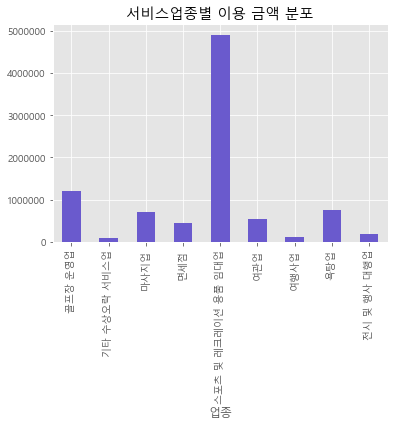

In [60]:
df3['이용금액'].groupby([df3['업종']]).mean().plot(kind='bar' , color='slateblue')   
plt.title('서비스업종별 이용 금액 분포')
plt.show()

- 스포츠 및 레크레이션 용품 임대업 > 골프장 운영업 > 욕탕업 > 마사지업 


- 스포츠 및 레크레이션 용품 임대업(각종의 운동, 여가 및 유희용품을 임대하는 산업활동을 말한다. <예 시> ·스키 임대 ·장난감 임대 ·자전거 임대 ·물놀이기구 임대 ·카누)이 가장 높은 순위를 보였고 다른 산업은 크게 이용 금액이 높아 보이진 않았다.

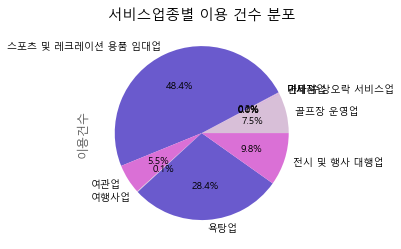

업종
골프장 운영업                30046
기타 수상오락 서비스업              63
마사지업                     332
면세점                      786
스포츠 및 레크레이션 용품 임대업    194617
여관업                    22265
여행사업                     547
욕탕업                   114041
전시 및 행사 대행업            39462
Name: 이용건수, dtype: int64

In [64]:
df3['이용건수'].groupby([df3['업종']]).sum().plot(kind='pie', autopct='%0.1f%%' , colors=['thistle','slateblue','orchid'])
plt.title('서비스업종별 이용 건수 분포')
plt.show()

df3['이용건수'].groupby([df3['업종']]).sum()

- 스포츠 및 레크레이션 용품 임대업 > 욕탕업 > 전시 및 행사 대행업> 골프장 운영업 > 여관업 


- 이용 금액과 마찬가지로 스포츠 및 레크레이션 용품 임대업이 과반수 정도의 가장 큰 비율을 차지했고 이용 금액과는 다르게 욕탕업이 2위를 차지했다. 이는 실생활과 연관이 있을 것이라고 판단이 되고 상대적으로 골프장 운영업이 이용 금액 순위에 비해 차지하는 비율이 적은 것을 보면 골프장 운영업이 상대적으로 단가가 높거나 이용금액을 많이 지불해서 그런걸 수도 있다는 추측을 할 수 있다. 


- 전시 및 행사 대행사도 적지 않은 비율로 3번째로 많이 이용되고 있다.

Text(0.5, 1.0, '서비스업종별 재방문율 분포')

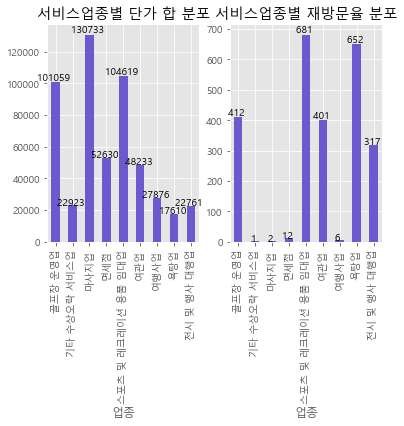

In [65]:
plt.subplot(1,2,1);

ax= df3['단가'].groupby([df3['업종']]).mean().plot(kind='bar' , color='slateblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')

plt.title('서비스업종별 단가 합 분포')

plt.subplot(1,2,2);
ax= df3['재이용률'].groupby([df3['업종']]).sum().plot(kind='bar',color='slateblue')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')

plt.title('서비스업종별 재방문율 분포')

- 단가:
  - 마사지업> 스포츠 및 레크레이션 임대업 > 골프장 운영업 > 면세점 > 여관업 
  - 마사지업의 단가가 가장 높았으며 스포츠 및 레크레이션 임대업이 그 뒤를 이루었다. 그 뒤의 골프장 운영업 역시 단가가 높았으며 이용건수에 비해 이용 금액의 순위가 높았던 것도 이에 의해 해석될 수 있다고 판단된다.

- 재방문율:
  - 스포츠 및 레크레이션 용품 임대업 > 욕탕업 > 골프장 운영업 > 여관업
  - 스포츠 및 레크레이션 용품 임대업이 매우 높았고 이에 적지않게 욕탕업이 높았다. 욕탕업은 실생활과 관련되어 있고 거주지 내의 욕탕을 이용할 확률이 높을 것으로 예상됨으로 이와 같은 분포가 나왔을 것이라 추측한다.

# 전라도 + 광주 _ 60대 남성

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12

In [2]:
data_origin = pd.read_csv('C:/Users/82106/OneDrive/바탕 화면/201901-202003.csv')
#data_origin = pd.read_csv("/Users/admin/Desktop/201901-202003.csv")
data_origin.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [3]:
#너무 많은 결측값을 가지는 컬럼 삭제
data = data_origin.drop(['CARD_CCG_NM','HOM_CCG_NM'],axis = 1)

In [4]:
data_origin = pd.read_csv('C:/Users/82106/OneDrive/바탕 화면/201901-202003.csv')
#data_origin = pd.read_csv("/Users/admin/Desktop/201901-202003.csv")
data_origin.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [5]:
col = ['날짜','시도','시군구','업종','거주지역1','거주지역2','연령대','성별','가구','이용고객수','이용금액','이용건수']
data_origin.columns = col

In [6]:
df_data = pd.read_csv('C:/Users/82106/OneDrive/바탕 화면/202004.csv')
#df_data = pd.read_csv('/Users/admin/Desktop/202004.csv')
col = ['날짜','시도','시군구','업종','거주지역1','거주지역2','연령대','성별','가구','이용고객수','이용금액','이용건수']
df_data.columns = col

In [7]:
all_data = pd.concat([data_origin,df_data])

In [8]:
#전라북도 + 전라남도 + 광주

is_j = (all_data['시도'] == '전북')|(all_data['시도'] == '전남')|(all_data['시도'] == '광주')
df_j = all_data[is_j]

# 60대 남성 

is_j6b = (df_j['성별'] == 1) & (df_j['연령대'] == '60s')
df_j6b = df_j[is_j6b]

df_j6b

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수
569278,201901,광주,광산구,건강보조식품 소매업,광주,광산구,60s,1,5,39,6202970,45
569298,201901,광주,광산구,골프장 운영업,광주,광산구,60s,1,5,16,501000,16
569301,201901,광주,광산구,골프장 운영업,광주,남구,60s,1,5,16,663000,20
569304,201901,광주,광산구,골프장 운영업,광주,동구,60s,1,5,6,377000,6
569308,201901,광주,광산구,골프장 운영업,광주,북구,60s,1,5,17,489000,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1217718,202004,전북,진안군,한식 음식점업,충남,공주시,60s,1,5,3,21700,3
1217723,202004,전북,진안군,한식 음식점업,충남,금산군,60s,1,5,18,858000,24
1217729,202004,전북,진안군,한식 음식점업,충남,논산시,60s,1,5,3,41500,4
1217733,202004,전북,진안군,한식 음식점업,충남,보령시,60s,1,5,3,32100,3


## 01. 기본 타겟 분석

### 1-1 가구 유형

In [9]:
set(df_j6b['가구'])

{5}

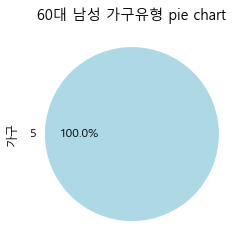

In [10]:
df_j6b['가구'].groupby([df_j6b['가구']]).mean().plot(kind='pie', autopct='%0.1f%%' ,colors = ['lightblue'])
plt.title('60대 남성 가구유형 pie chart')
plt.show()

60대 남성은 모두 가구 유형 5 로 이루어져있다,

## 02. 업종 분류별

In [11]:
mark = ['건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업']
trans = ['택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업']
service = ['마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업']
xlist = []
for i in df_j6b['업종']:
    if i in mark:
        xlist.append('소매업')
    elif i in trans:
        xlist.append('운송업')
    elif i in service:
        xlist.append('서비스업')
    else: 
        xlist.append('삭제')
df_j6b['업종분류'] = xlist

dr = df_j6b[df_j6b['업종분류'] == '삭제'].index
df_j6b = df_j6b.drop(dr)

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


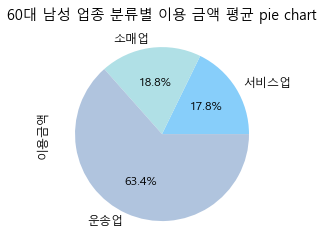

In [12]:
df_j6b['이용금액'].groupby([df_j6b['업종분류']]).mean().plot(kind='pie', autopct='%0.1f%%' , colors=['lightskyblue','powderblue','lightsteelblue'])
plt.title('60대 남성 업종 분류별 이용 금액 평균 pie chart')
plt.show()

* 운송업이 이용 금액 평균이 가장 높았으며 소매업과 서비스업은 비슷한 결과를 보인다. 
* 운송업이 전라도 + 광주 60대 남성의 전체 이용 금액 평균의 63.4 %를 차지하며 상당히 큰 영향을 미치는 것을 알 수 있다.

### 02-1 . 소매업

In [13]:
is_j6bm = (df_j6b['업종분류'] == '소매업')
df_j6bm = df_j6b[is_j6bm]

df_j6bm['단가'] = df_j6bm['이용금액']/df_j6bm['이용건수']
df_j6bm['재이용율'] = (df_j6bm['이용건수']-df_j6bm['이용고객수'])/(df_j6bm['이용고객수'])*100
df_j6bm

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,업종분류,단가,재이용율
569278,201901,광주,광산구,건강보조식품 소매업,광주,광산구,60s,1,5,39,6202970,45,소매업,137843.777778,15.384615
569339,201901,광주,광산구,과실 및 채소 소매업,광주,광산구,60s,1,5,263,12700098,385,소매업,32987.267532,46.387833
569348,201901,광주,광산구,과실 및 채소 소매업,광주,남구,60s,1,5,3,373967,4,소매업,93491.750000,33.333333
569365,201901,광주,광산구,과실 및 채소 소매업,광주,북구,60s,1,5,12,572260,16,소매업,35766.250000,33.333333
569377,201901,광주,광산구,과실 및 채소 소매업,광주,서구,60s,1,5,29,988600,33,소매업,29957.575758,13.793103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216950,202004,전북,진안군,육류 소매업,전북,익산시,60s,1,5,3,120000,3,소매업,40000.000000,0.000000
1216956,202004,전북,진안군,육류 소매업,전북,전주시 덕진구,60s,1,5,20,724620,22,소매업,32937.272727,10.000000
1216962,202004,전북,진안군,육류 소매업,전북,전주시 완산구,60s,1,5,15,699970,17,소매업,41174.705882,13.333333
1216974,202004,전북,진안군,육류 소매업,전북,진안군,60s,1,5,30,1512930,40,소매업,37823.250000,33.333333


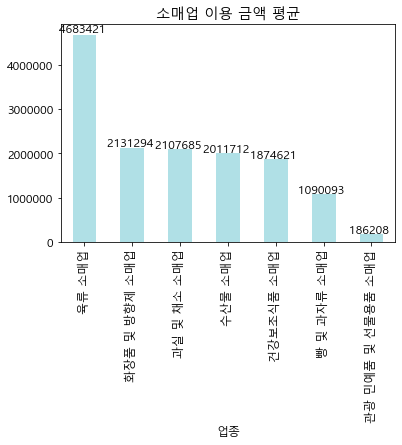

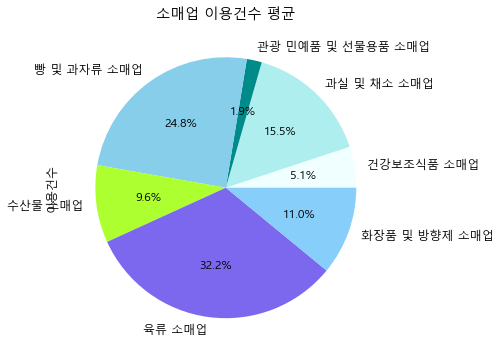

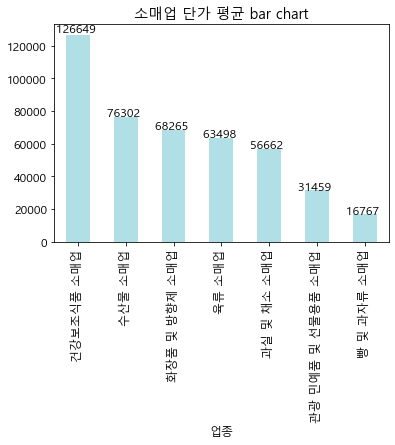

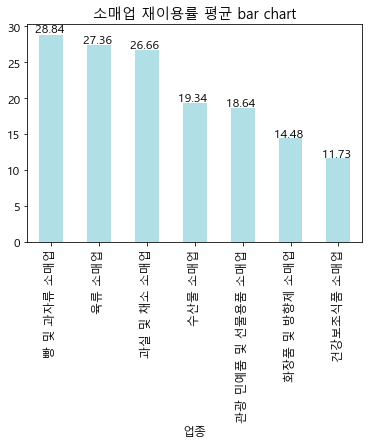

In [23]:
#이용금액_bar
ax = df_j6bm['이용금액'].groupby([df_j6bm['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='powderblue')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('소매업 이용 금액 평균')
plt.show()

#이용건수_pie
color = ['azure','paleturquoise','darkcyan','skyblue','greenyellow','mediumslateblue','lightskyblue']
plt.figure(figsize=(6,6))

ax = df_j6bm['이용건수'].groupby([df_j6bm['업종']]).mean().plot(kind='pie' ,colors=color, autopct='%0.1f%%')
    
plt.title('소매업 이용건수 평균')
plt.show()

#이용단가_bar
ax = df_j6bm['단가'].groupby([df_j6bm['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='powderblue')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('소매업 단가 평균 bar chart')
plt.show()

#재이용률_bar
ax = df_j6bm['재이용율'].groupby([df_j6bm['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='powderblue')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('소매업 재이용률 평균 bar chart')
plt.show()

이용 금액 평균 순위 :  
육류 > 과실 및 채소 > 화장품 및 방향제 > 수산물 > 건강 보조 식품 > 빵 및 과자류 > 관광 민예품 및 선물용품  
  
   
이용 건수 평균 순위:  
육류 > 빵 및 과자류 > 과실 및 채소 > 화장품 및 방향제 > 수산물 > 건강 보조식품 > 관광 민예품 및 선물용품  
  
  
* 운송업에 비해 소매업은 소매업 전체 평균과 가까운 업종들이 몇 존재 ( 과실 및 채소, 화장품 및 방향제, 수산물 )  
-> 육류의 영향을 많이 받지만 영향력이 운송업에서 차량용 주유소 운영업만큼은 아닐 것 

* 이용금액/이용건수  
  
  
1. 주식으로 사용하는 육류가 금액, 건수, 고객수에서 가장 높은 순위를 차지하였다.  
2. 육류와 과실 및 채소는 상위권에 있으나 수산물은 비교적 중하위권에 위치한 것으로 보아 전라도 + 광주는 수산물을 즐겨 먹지 않는다고 예상  
3. 연령대가 60대여서 건강 보조 식품의 이용 건수와 금액이 높을 것이라 예상했는데 오히려 낮았다.  
4. 관광 민예품 및 선물용품은 가장 적게 이용하는 업종이다. 

단가 평균 순위 :  
건강 보조 식품 > 수산물 > 과실 및 채소 소매업 > 화장품 및 방향제 > 육류 > 관광 민예품 및 선물 용품 > 빵 및 과자류  
  
  
재이용률 평균 순위 :  
빵 및 과자류 > 육류 = 과실 및 채소 > 수산물 = 관광 민예품 및 선물용품 > 화장품 및 방향제 > 건강 보조식품  
(재이용률은 큰 차이를 보이지 않는다.)

### 02-2. 운송업

In [17]:
is_j6bt = (df_j6b['업종분류'] == '운송업')
df_j6bt = df_j6b[is_j6bt]

df_j6bt['단가'] = df_j6bt['이용금액']/df_j6bt['이용건수']
df_j6bt['재이용율'] = (df_j6bt['이용건수']-df_j6bt['이용고객수'])/(df_j6bt['이용고객수'])*100
df_j6bt

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,업종분류,단가,재이용율
572456,201901,광주,광산구,자동차 임대업,제주,제주시,60s,1,5,4,560600,5,운송업,112120.000000,25.000000
572647,201901,광주,광산구,차량용 가스 충전업,광주,광산구,60s,1,5,318,18604046,613,운송업,30349.177814,92.767296
572660,201901,광주,광산구,차량용 가스 충전업,광주,남구,60s,1,5,51,2259054,74,운송업,30527.756757,45.098039
572671,201901,광주,광산구,차량용 가스 충전업,광주,동구,60s,1,5,14,688827,22,운송업,31310.318182,57.142857
572688,201901,광주,광산구,차량용 가스 충전업,광주,북구,60s,1,5,121,5370459,203,운송업,26455.463054,67.768595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217137,202004,전북,진안군,차량용 주유소 운영업,전북,장수군,60s,1,5,8,477250,10,운송업,47725.000000,25.000000
1217148,202004,전북,진안군,차량용 주유소 운영업,전북,전주시 덕진구,60s,1,5,21,1006974,26,운송업,38729.769231,23.809524
1217158,202004,전북,진안군,차량용 주유소 운영업,전북,전주시 완산구,60s,1,5,23,1561302,37,운송업,42197.351351,60.869565
1217174,202004,전북,진안군,차량용 주유소 운영업,전북,진안군,60s,1,5,818,106091595,2152,운송업,49299.068309,163.080685


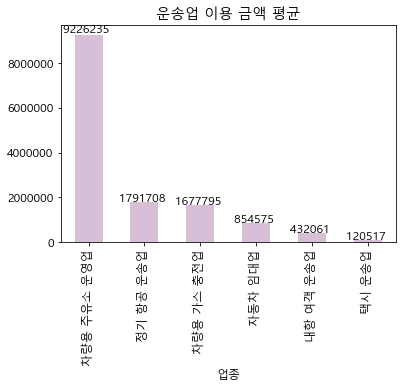

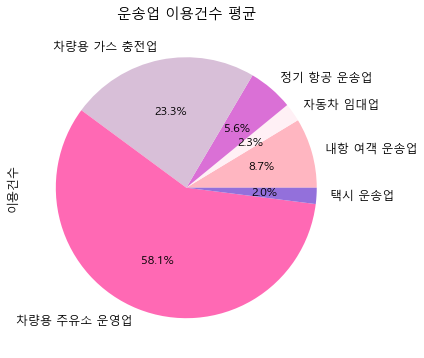

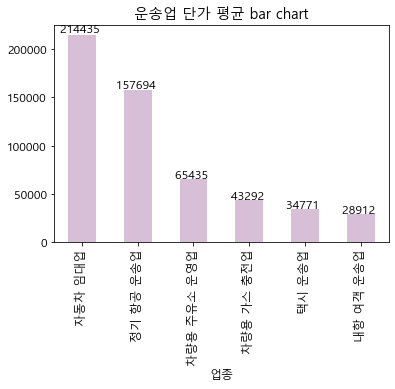

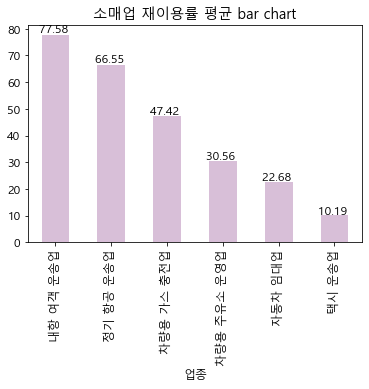

In [18]:
#이용금액_bar
ax = df_j6bt['이용금액'].groupby([df_j6bt['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='thistle')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('운송업 이용 금액 평균')
plt.show()

#이용건수_pie
color = ['lightpink','lavenderblush','orchid','thistle','hotpink','mediumpurple']
plt.figure(figsize=(6,6))

ax = df_j6bt['이용건수'].groupby([df_j6bt['업종']]).mean().plot(kind='pie' ,colors=color, autopct='%0.1f%%')
    
plt.title('운송업 이용건수 평균')
plt.show()

#이용단가_bar
ax = df_j6bt['단가'].groupby([df_j6bt['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='thistle')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('운송업 단가 평균 bar chart')
plt.show()

#재이용률_bar
ax = df_j6bt['재이용율'].groupby([df_j6bt['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='thistle')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('소매업 재이용률 평균 bar chart')
plt.show()

이용 금액 평균 순위 :  
차량용 주유소 운영업 -> 정기 항공 운송업 -> 차량용 가스 충전업 -> 자동차 입대업 -> 내항 여객기 운송업 -> 택시 운송업  
  
이용 건수 평균 순위 :  
차량용 주유소 운영업 -> 차량용 가스 충전업 -> 내항 여객 운송업 -> 정기 항공운송업 -> 자동차 임대업 -> 택시 운송업  

* 이용금액 / 이용건수  
  
  
1. 차량용 주유소 운영업이 가장 많이 이용되어진다. / 택시 운송업이 가장 적게 이용되어 진다, 

  
2. 이용건수는 차량용 가스 충전업 > 정기 항공운송업이고 이용금액 평균은 정기 항공운송업 > 차량용 가스 충전업 인것을 통해   
단가 평균이 **정기 항공운송업 > 차량용 가스 충전업** 이라 예상  
  
  
3. 이용 건수는 내항 여객 운송업 > 자동차 임대업이고 이용 금액 평균은 자동차 임대업 > 내항 여객 운송업 인것을 통해  
단가 평균은 **자동차 임대업 > 내항 여객 운송업** 이라 예상  
  
  
4. 이용 건수는 내항 여객 운송업 > 정기 항공 운송업 이고 이용 금액 평균은 정기 항공 운송업 > 내항 여객 운송업 인것을 통해   
단가 평균은 **정기 항공 운송업 > 내항 여객 운송업** 이라 예상

* 단가 / 재이용률  
  
  
1. **차량용 주유소 운영업**은 이용금액평균, 이용건수평균, 이용 고객수 평균에서 1위를 차지 했고 단가에서는 높은 편이 아닌 것을 통해  
**이용 건수와 이용 고객 수가 상대적으로 많은 업종**이라고 볼 수 있을 것  
  
  
2. 그에 비해 **자동차 임대업**은 단가가 가장 높은 업종임에도 **이용건수와 이용 고객 수가 상대적으로 매우 적어** 이용 금액 평균에서 상위권에 들지 못한 것  
  
  
3. 재이용률은 내항 여객 운송업 > 정기 항공운송업 > 차량용 가스 충전업 > 차량용 주유소 운영업 > 자동차 임대업 > 택시 운송업 으로  
60대 남성의 경우 택시를 거의 이용하지 않는다고 볼 수 있다. 

<hr>

***60대 남성의 운송업 소비 형태: 대부분 차량용 주유소 운영업으로 자가용을 많이 몰고 택시는 거의 사용하지 않는다고 볼 수 있다.***  
  
  
* 참고 )  
노인운전면허증 반납제도는 서울시, 인천시, 군포시, 안양시, 양주시, 전주시, 여수시, 포항시, 거창군, 부산시에서 시행되고 있으며, 지원기준은 65~75세 이상 운전자가 해당 

<hr>

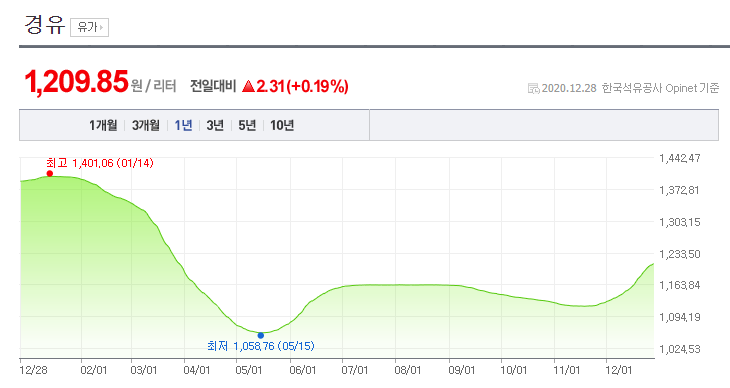

In [19]:
from IPython.display import Image
 
Image("C:/Users/82106/OneDrive/바탕 화면/20201228_192737.png")

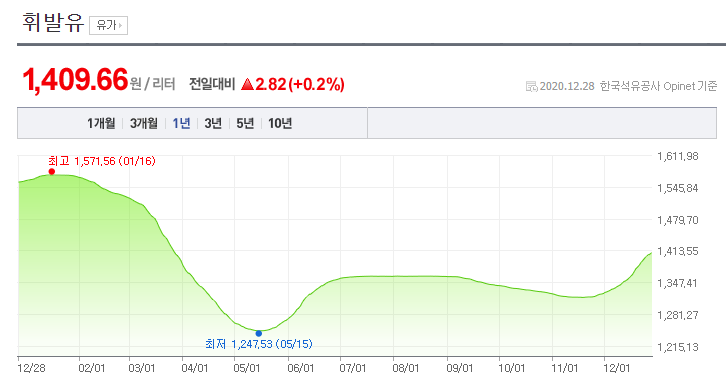

In [20]:
Image("C:/Users/82106/OneDrive/바탕 화면/20201228_193119.png")

운송업에서 가장 큰 영향을 미치는 차량용 주유소 운영업은 경우값과 휘발유 값에 영향을 많이 받을 것  
실제로 2019~2020 경우.휘발유 값을 보면 가격이 봄에는 가장 낮고 겨울에 가장 높은 것을 볼 수 있었다  
그럼에도 겨울의 이용 건수와 이용 금액이 하위권에 머무는 것을 통해 60대 남성은 겨울에는 이동을 많이 하지 않는 것이라고 예상  

### 02-3. 서비스업

In [21]:
is_j6bs = (df_j6b['업종분류'] == '서비스업')
df_j6bs = df_j6b[is_j6bs]

df_j6bs['단가'] = df_j6bs['이용금액']/df_j6bs['이용건수']
df_j6bs['재이용율'] = (df_j6bs['이용건수']-df_j6bs['이용고객수'])/(df_j6bs['이용고객수'])*100
df_j6bs

C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\82106\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,업종분류,단가,재이용율
569298,201901,광주,광산구,골프장 운영업,광주,광산구,60s,1,5,16,501000,16,서비스업,31312.500000,0.000000
569301,201901,광주,광산구,골프장 운영업,광주,남구,60s,1,5,16,663000,20,서비스업,33150.000000,25.000000
569304,201901,광주,광산구,골프장 운영업,광주,동구,60s,1,5,6,377000,6,서비스업,62833.333333,0.000000
569308,201901,광주,광산구,골프장 운영업,광주,북구,60s,1,5,17,489000,17,서비스업,28764.705882,0.000000
569312,201901,광주,광산구,골프장 운영업,광주,서구,60s,1,5,28,1309000,40,서비스업,32725.000000,42.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216550,202004,전북,진안군,골프장 운영업,전북,완주군,60s,1,5,6,753000,8,서비스업,94125.000000,33.333333
1216555,202004,전북,진안군,골프장 운영업,전북,익산시,60s,1,5,5,1006000,7,서비스업,143714.285714,40.000000
1216564,202004,전북,진안군,골프장 운영업,전북,전주시 덕진구,60s,1,5,31,5084000,52,서비스업,97769.230769,67.741935
1216576,202004,전북,진안군,골프장 운영업,전북,전주시 완산구,60s,1,5,37,5390800,49,서비스업,110016.326531,32.432432


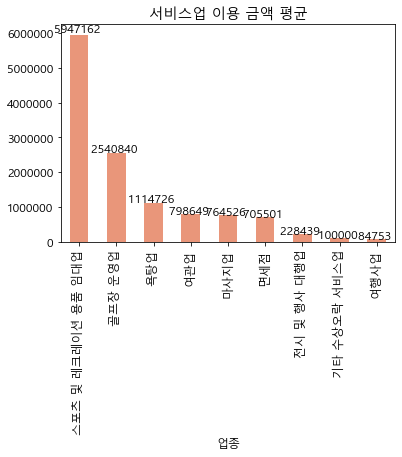

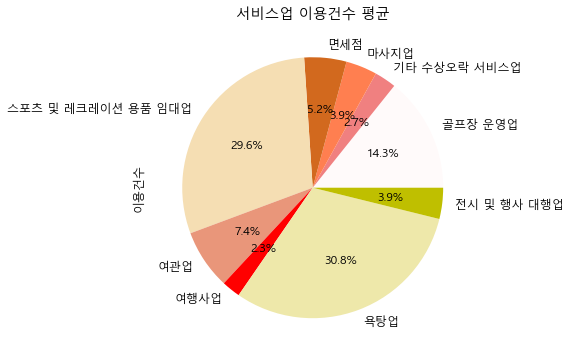

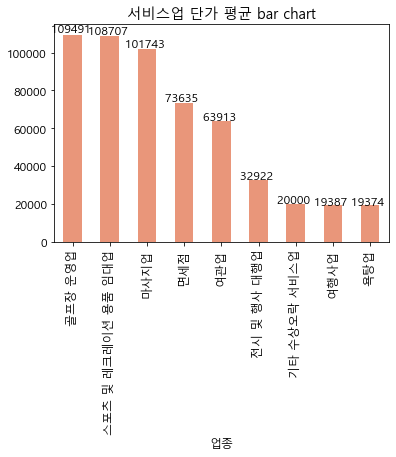

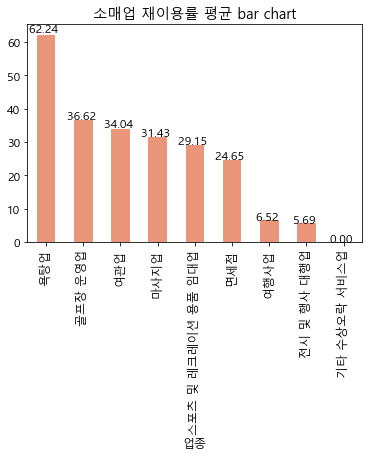

In [22]:
#이용금액_bar
ax = df_j6bs['이용금액'].groupby([df_j6bs['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='darksalmon')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('서비스업 이용 금액 평균')
plt.show()

#이용건수_pie
color = ['snow','lightcoral','coral','chocolate','wheat','darksalmon','r','palegoldenrod','y']

plt.figure(figsize=(6,6))

ax = df_j6bs['이용건수'].groupby([df_j6bs['업종']]).mean().plot(kind='pie' ,colors=color, autopct='%0.1f%%')
    
plt.title('서비스업 이용건수 평균')
plt.show()

#이용단가_bar
ax = df_j6bs['단가'].groupby([df_j6bs['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='darksalmon')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.0f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('서비스업 단가 평균 bar chart')
plt.show()

#재이용률_bar
ax = df_j6bs['재이용율'].groupby([df_j6bs['업종']]).mean().sort_values(ascending=False).plot(kind='bar' , color='darksalmon')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f "%(height),(left+width/2, height*1.01), ha='center')
    
plt.title('소매업 재이용률 평균 bar chart')
plt.show()

이용 금액 평균 순위 :  
스포츠 및 레크레이션 용품 임대업 > 골프장 운영업 > 욕탕업 > 여관업 > 마사지업 > 면세점 > 전시 및 행사 대행업 > 기타 수상오락 서비스업 > 여해사업  
  
  
이용 건수 평균 순위 :  
욕탕업 > 스포츠 및 레크레이션 용품 임대업 > 골프장 운영업 > 여관업 > 면세점 > 마사지업 = 전시 및 행사 대행업 > 기타 수상오락 서비스업 > 여행사업  

* 전라도 + 광주 60대 남성의 서비스업 이용  
스포츠 및 레크레이션 용품 임대업과 골프장 운영업, 욕탕업이 가장 인기가 많았으며  
기타 수상 오락 서비스업과 여행사업은 인기가 없었다  
* 스포츠 및 레크레이션 업종이 단체로 하는 경우가 많아서 이용 고객수가 많았을 것이며  
욕탕업은 많은 사람들이 일상중에 자주 사용하는 업종이기에 이용 건수가 많았을 것이다  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#폰트
plt.rc("font", family='Malgun Gothic')

In [2]:
credit1 = pd.read_csv("C:/Users/82106/OneDrive/바탕 화면/201901-202003.csv")
credit2 = pd.read_csv("C:/Users/82106/OneDrive/바탕 화면/202004.csv")
credit = pd.concat([credit1,credit2],axis=0)


In [3]:
col = ['날짜','시도','시군구','업종','거주지역1','거주지역2','연령대','성별','가구','이용고객수','이용금액','이용건수']
credit1.columns = col
credit1.head()

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [4]:
# # 1. 단가 , 재이용률, 이용금액, 이용건수
#단가, 재이용률 변수 생성
############ credit -> credit1

credit1['단가'] = round((credit1['이용금액'] / credit1['이용건수']),2)
credit1['재이용률'] = round(((credit1.이용건수 - credit1.이용고객수) / credit1.이용고객수 * 100),2)

credit1.head()

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,단가,재이용률
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,77800.0,0.00
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,171812.5,14.29
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,136450.0,0.00
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,343400.0,25.00
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,349100.0,0.00


In [5]:
#60대여성
credit_w_60 = credit1[(credit1.연령대=="60s")&(credit1.성별==2)].reset_index(drop=True)

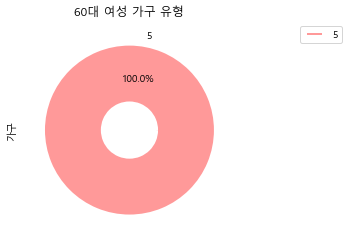

In [6]:
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

credit_w_60.가구.value_counts().plot(kind='pie', autopct='%0.1f%%' , startangle=260,colors=colors, wedgeprops=wedgeprops)
plt.title("60대 여성 가구 유형")
plt.legend(credit_w_60['가구'], bbox_to_anchor=(1.5, 1))

In [9]:
# # 업종분류(60대 여성 소비 업종 비율 )

mark = ['건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업']
trans = ['택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업']
service = ['마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업']
xlist = []
for i in credit_w_60['업종']:
    if i in mark:
        xlist.append('소매업')
    elif i in trans:
        xlist.append('운송업')
    elif i in service:
        xlist.append('서비스업')
    else: 
        xlist.append('삭제')
credit_w_60['업종분류'] = xlist

dr = credit_w_60[credit_w_60['업종분류'] == '삭제'].index
credit_w_60 = credit_w_60.drop(dr)

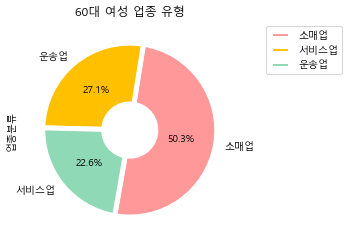

In [10]:
colors = ['#ff9999', '#ffc000','#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

credit_w_60.업종분류.value_counts().plot(kind='pie', autopct='%0.1f%%' , startangle=260,colors=colors, wedgeprops=wedgeprops)
plt.title("60대 여성 업종 유형")
plt.legend(credit_w_60.업종분류.unique(), bbox_to_anchor=(1.5, 1))

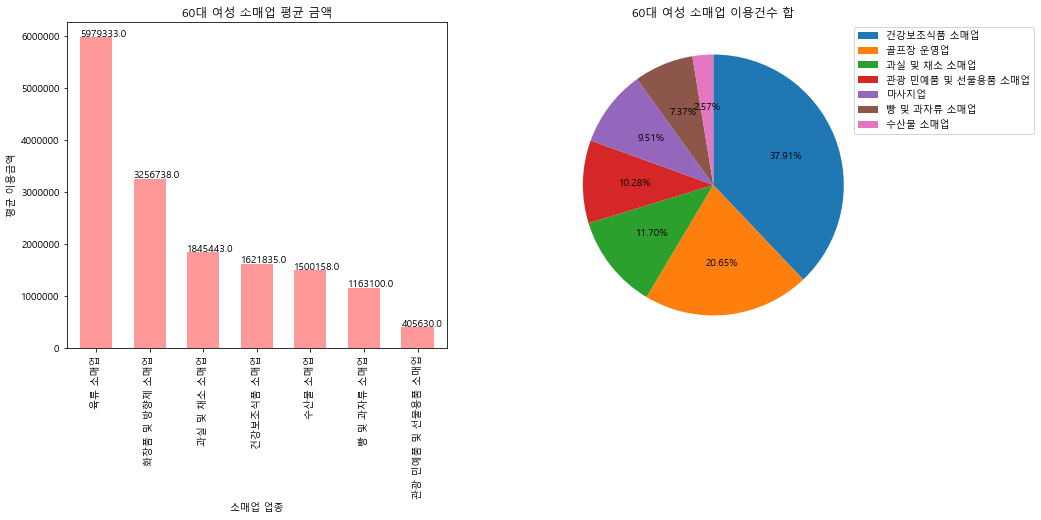

In [11]:
# # 2.업종 유형  (3)
# # 2-1소매업

#이용금액(평균)_bar chart
#이용건수(합계)_pie chart

fig = plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(1,2,1)
mart = credit_w_60[credit_w_60.업종분류=='소매업'].groupby([credit_w_60['업종']])['이용금액'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 소매업 평균 금액")
plt.xlabel('소매업 업종')
plt.ylabel('평균 이용금액')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 15000, str(round(value,0)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
plt.title("60대 여성 소매업 이용건수 합")
ax2.pie(mart, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       )
 
plt.legend(credit_w_60.업종.unique(), bbox_to_anchor=(1.5, 1)) ## 범례 표시

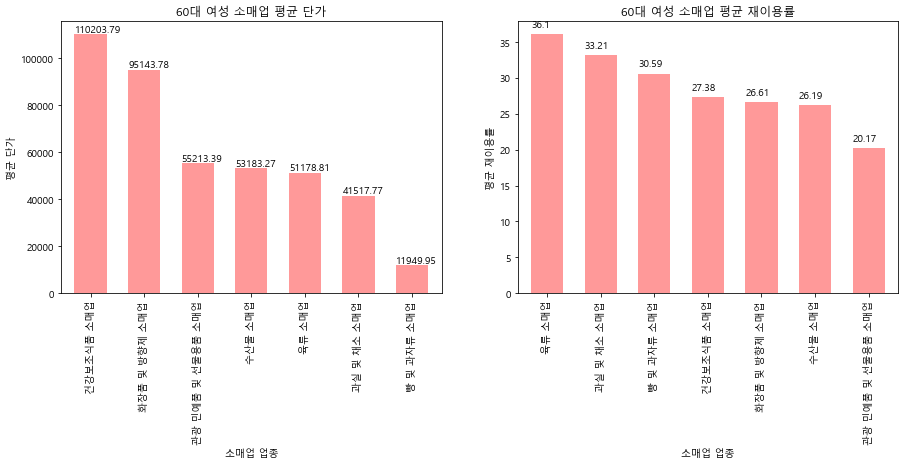

In [12]:
#단가(평균)_bar chart
#재이용률(평균)_ bar chart
fig = plt.figure(figsize=(15,5)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
mart = credit_w_60[credit_w_60.업종분류=='소매업'].groupby([credit_w_60['업종']])['단가'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 소매업 평균 단가")
plt.xlabel('소매업 업종')
plt.ylabel('평균 단가')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1000, str(round(value,2)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
mart = credit_w_60[credit_w_60.업종분류=='소매업'].groupby([credit_w_60['업종']])['재이용률'].mean().sort_values(ascending=False)
mart.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 소매업 평균 재이용률")
plt.xlabel('소매업 업종')
plt.ylabel('평균 재이용률')

for index, value in enumerate(mart):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  # x 좌표, y 좌표, text


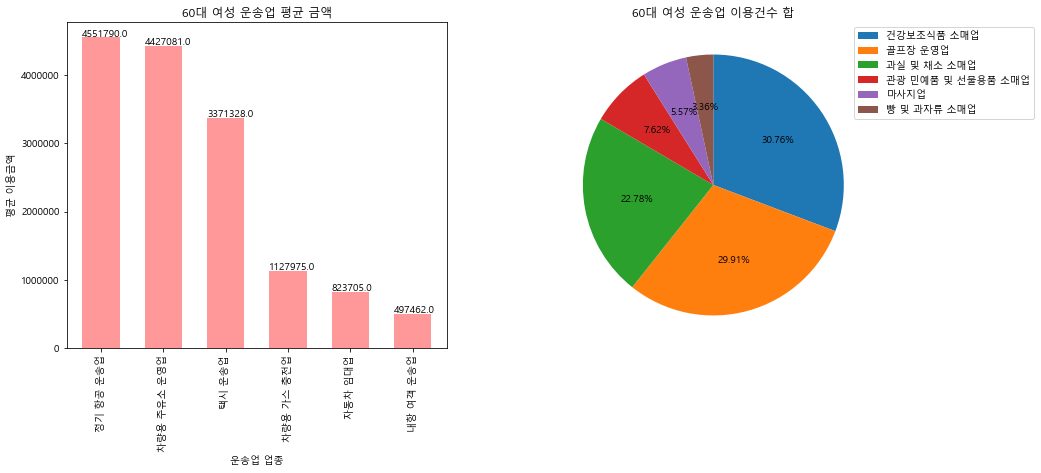

In [13]:
# # 2-2 운송업

fig = plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(1,2,1)
transform = credit_w_60[credit_w_60.업종분류=='운송업'].groupby([credit_w_60['업종']])['이용금액'].mean().sort_values(ascending=False)
transform.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 운송업 평균 금액")
plt.xlabel('운송업 업종')
plt.ylabel('평균 이용금액')

for index, value in enumerate(transform):
    plt.text(index - 0.3, value + 15000, str(round(value,0)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
plt.title("60대 여성 운송업 이용건수 합")
ax2.pie(transform, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       )
 
plt.legend(credit_w_60.업종.unique(), bbox_to_anchor=(1.5, 1)) ## 범례 표시

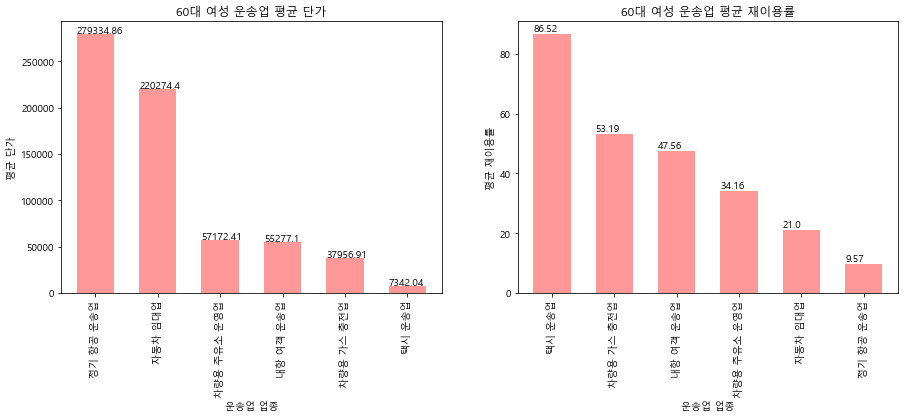

In [14]:
#단가(평균)_bar chart
#재이용률(평균)_ bar chart
fig = plt.figure(figsize=(15,5)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
transform = credit_w_60[credit_w_60.업종분류=='운송업'].groupby([credit_w_60['업종']])['단가'].mean().sort_values(ascending=False)
transform.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 운송업 평균 단가")
plt.xlabel('운송업 업종')
plt.ylabel('평균 단가')

for index, value in enumerate(transform):
    plt.text(index - 0.3, value + 1000, str(round(value,2)))  

ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
transform = credit_w_60[credit_w_60.업종분류=='운송업'].groupby([credit_w_60['업종']])['재이용률'].mean().sort_values(ascending=False)
transform.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 운송업 평균 재이용률")
plt.xlabel('운송업 업종')
plt.ylabel('평균 재이용률')

for index, value in enumerate(transform):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  


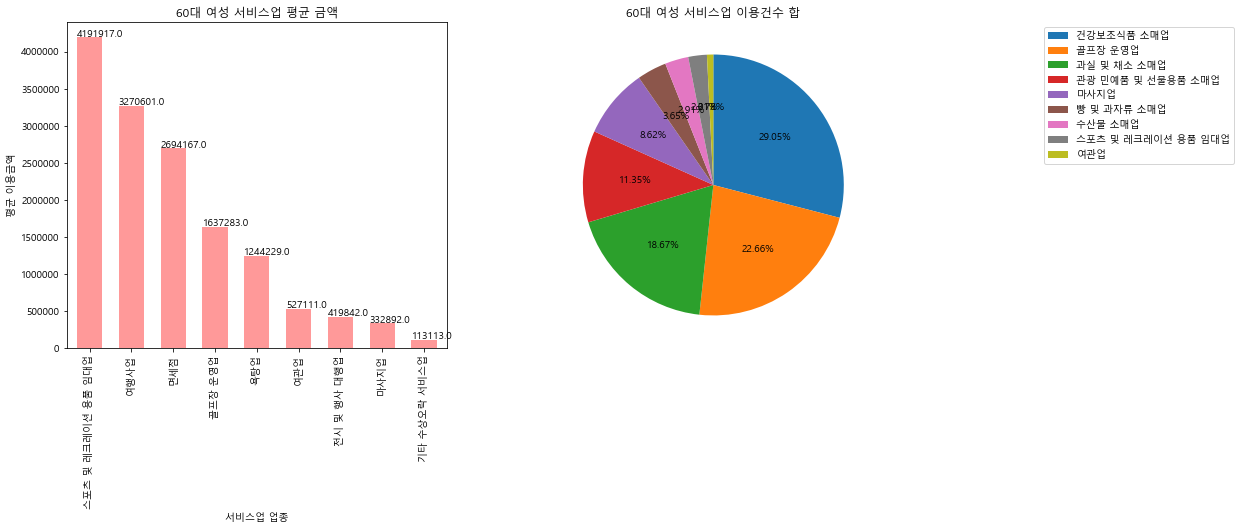

In [15]:
fig = plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(1,2,1)
serve = credit_w_60[credit_w_60.업종분류=='서비스업'].groupby([credit_w_60['업종']])['이용금액'].mean().sort_values(ascending=False)
serve.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 서비스업 평균 금액")
plt.xlabel('서비스업 업종')
plt.ylabel('평균 이용금액')

for index, value in enumerate(serve):
    plt.text(index - 0.3, value + 15000, str(round(value,0)))  # x 좌표, y 좌표, text


ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
plt.title("60대 여성 서비스업 이용건수 합")
ax2.pie(serve, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       )
 
plt.legend(credit_w_60.업종.unique(), bbox_to_anchor=(1.5, 1)) ## 범례 표시

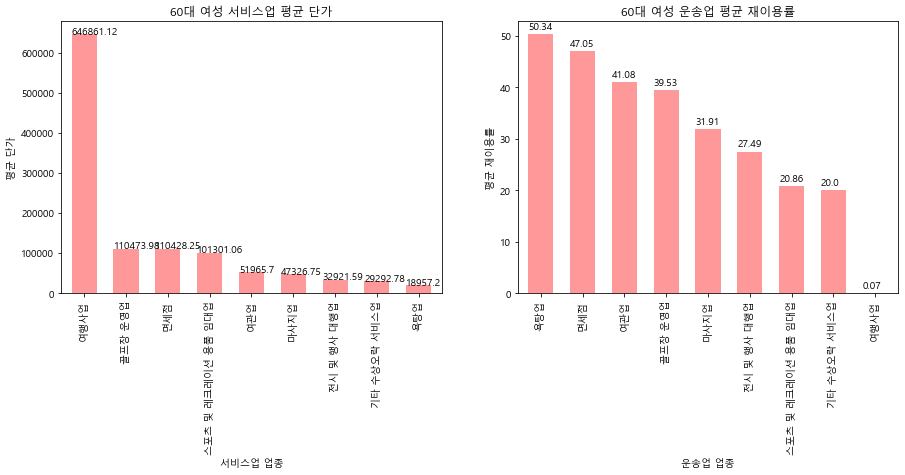

In [16]:
#단가(평균)_bar chart
#재이용률(평균)_ bar chart
fig = plt.figure(figsize=(15,5)) ## 캔버스 생성
ax1 = fig.add_subplot(1,2,1) ## 프레임 생성
serve = credit_w_60[credit_w_60.업종분류=='서비스업'].groupby([credit_w_60['업종']])['단가'].mean().sort_values(ascending=False)
serve.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 서비스업 평균 단가")
plt.xlabel('서비스업 업종')
plt.ylabel('평균 단가')

for index, value in enumerate(serve):
    plt.text(index - 0.3, value + 1000, str(round(value,2)))  

ax2 = fig.add_subplot(1,2,2) ## 프레임 생성
serve = credit_w_60[credit_w_60.업종분류=='서비스업'].groupby([credit_w_60['업종']])['재이용률'].mean().sort_values(ascending=False)
serve.plot(kind='bar',width=0.6, align='center',color='#ff9999')
plt.title("60대 여성 운송업 평균 재이용률")
plt.xlabel('운송업 업종')
plt.ylabel('평균 재이용률')

for index, value in enumerate(serve):
    plt.text(index - 0.3, value + 1, str(round(value,2)))  